## IS53051A: Machine Learning (2022-23) Coursework




**Team Lead: Sandor Kanda**  Student ID: 33635746 <br>
**Team Member:Carlos Alves** Student ID: 33617310                 


## I. Data inspection and visualisation

In [168]:
%matplotlib inline

### a. Loading the data and  Renaming Columns (for better readibility)

In [169]:
import pandas as pd

# load the dataset
dataset = pd.read_csv('datcw_na.csv')
# change the column names to actual variable names
dataset = dataset.rename(columns={ 'X0': 'Category of the Building',
                         'X1': 'Relative Compactness',
                         'X2': 'Surface Area',
                         'X3': 'Wall Area',
                         'X4': 'Roof Area',
                         'X5': 'Overall Height',
                         'X6': 'Orientation',
                         'X7': 'Glazing Area',
                         'X8': 'Glazing Area Distribution',
                         'Y':  'Heating Load'})

### b. Inspecting the data structure

In [170]:
dataset

Category of the Building  Relative Compactness  Surface Area  Wall Area  \
0                         C3                  1.19        622.55        NaN   
1                         C1                  1.19        622.55     323.40   
2                         C1                  0.88        463.05     291.06   
3                         C2                  0.79        509.36     291.06   
4                         C1                  0.89        507.15     385.39   
..                       ...                   ...           ...        ...   
763                       C3                  0.52        948.64     277.83   
764                       C2                  0.50        727.65        NaN   
765                       C1                  0.68        889.35     404.25   
766                       C3                  0.50        654.88     363.82   
767                       C3                  0.50        800.42     404.25   

     Roof Area  Overall Height  Orientation  Glazing Area  \
0        89.31            7.00         1.98          0.00   
1       109.15            7.70         3.00          0.00   
2        99.23            5.67         4.40          0.00   
3       121.28            6.30         4.05          0.00   
4       121.28            7.70         2.00          0.00   
..         ...             ...          ...           ...   
763     218.30            4.24         4.95          0.48   
764     266.80            3.47         1.98          0.44   
765     178.60            3.47         2.43          0.40   
766     218.30            3.15         3.96          0.36   
767     218.30            2.84         4.05          0.32   

     Glazing Area Distribution  Heating Load  
0                         0.00         15.55  
1                         0.00         15.55  
2                         0.00         15.55  
3                         0.00         15.55  
4                         0.00         20.84  
..                         ...           ...  
763                       4.05         17.88  
764                       5.00         16.54  
765                       4.95         16.44  
766                       4.50         16.48  
767                       4.95         16.64  

[768 rows x 10 columns]

### c. Retriving further information about the dataset (i.e.: empty values, datatypes)

In [171]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the Building   768 non-null    object 
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  728 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


### A summary of the central tendency, dispersion, and shape of the distribution of a dataset, including count, mean, standard deviation, minimum and maximum values, quartiles, and percentiles.

In [172]:
dataset.describe()

Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  728.000000  768.000000   
mean               0.763516    666.768997  321.102527  176.564141   
std                0.147093    120.863329   60.479340   51.280618   
min                0.500000    416.740000  198.450000   89.310000   
25%                0.650000    575.510000  277.830000  132.300000   
50%                0.750000    661.500000  315.320000  178.235000   
75%                0.860000    741.130000  355.740000  218.300000   
max                1.190000    978.290000  503.970000  266.800000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count      768.000000   768.000000    768.000000                 768.000000   
mean         5.229766     3.527331      0.237852                   2.803737   
std          1.844813     1.245710      0.139736                   1.597817   
min          2.840000     1.620000      0.000000                   0.000000   
25%          3.470000     2.427500      0.100000                   1.517500   
50%          4.955000     3.600000      0.240000                   2.970000   
75%          6.930000     4.425000      0.360000                   3.960000   
max          8.470000     6.050000      0.480000                   6.050000   

       Heating Load  
count    768.000000  
mean      22.307201  
std       10.090196  
min        6.010000  
25%       12.992500  
50%       18.950000  
75%       31.667500  
max       43.100000

#### It is noticable, that "Category of the Building" is a categorical variable, and the datatype is object, opposed to the rest of the columns: float64

In [173]:
dataset["Category of the Building"].value_counts()

C2    265
C3    260
C1    243
Name: Category of the Building, dtype: int64

### d. Visualising the data

#### Histogram of the full data frame

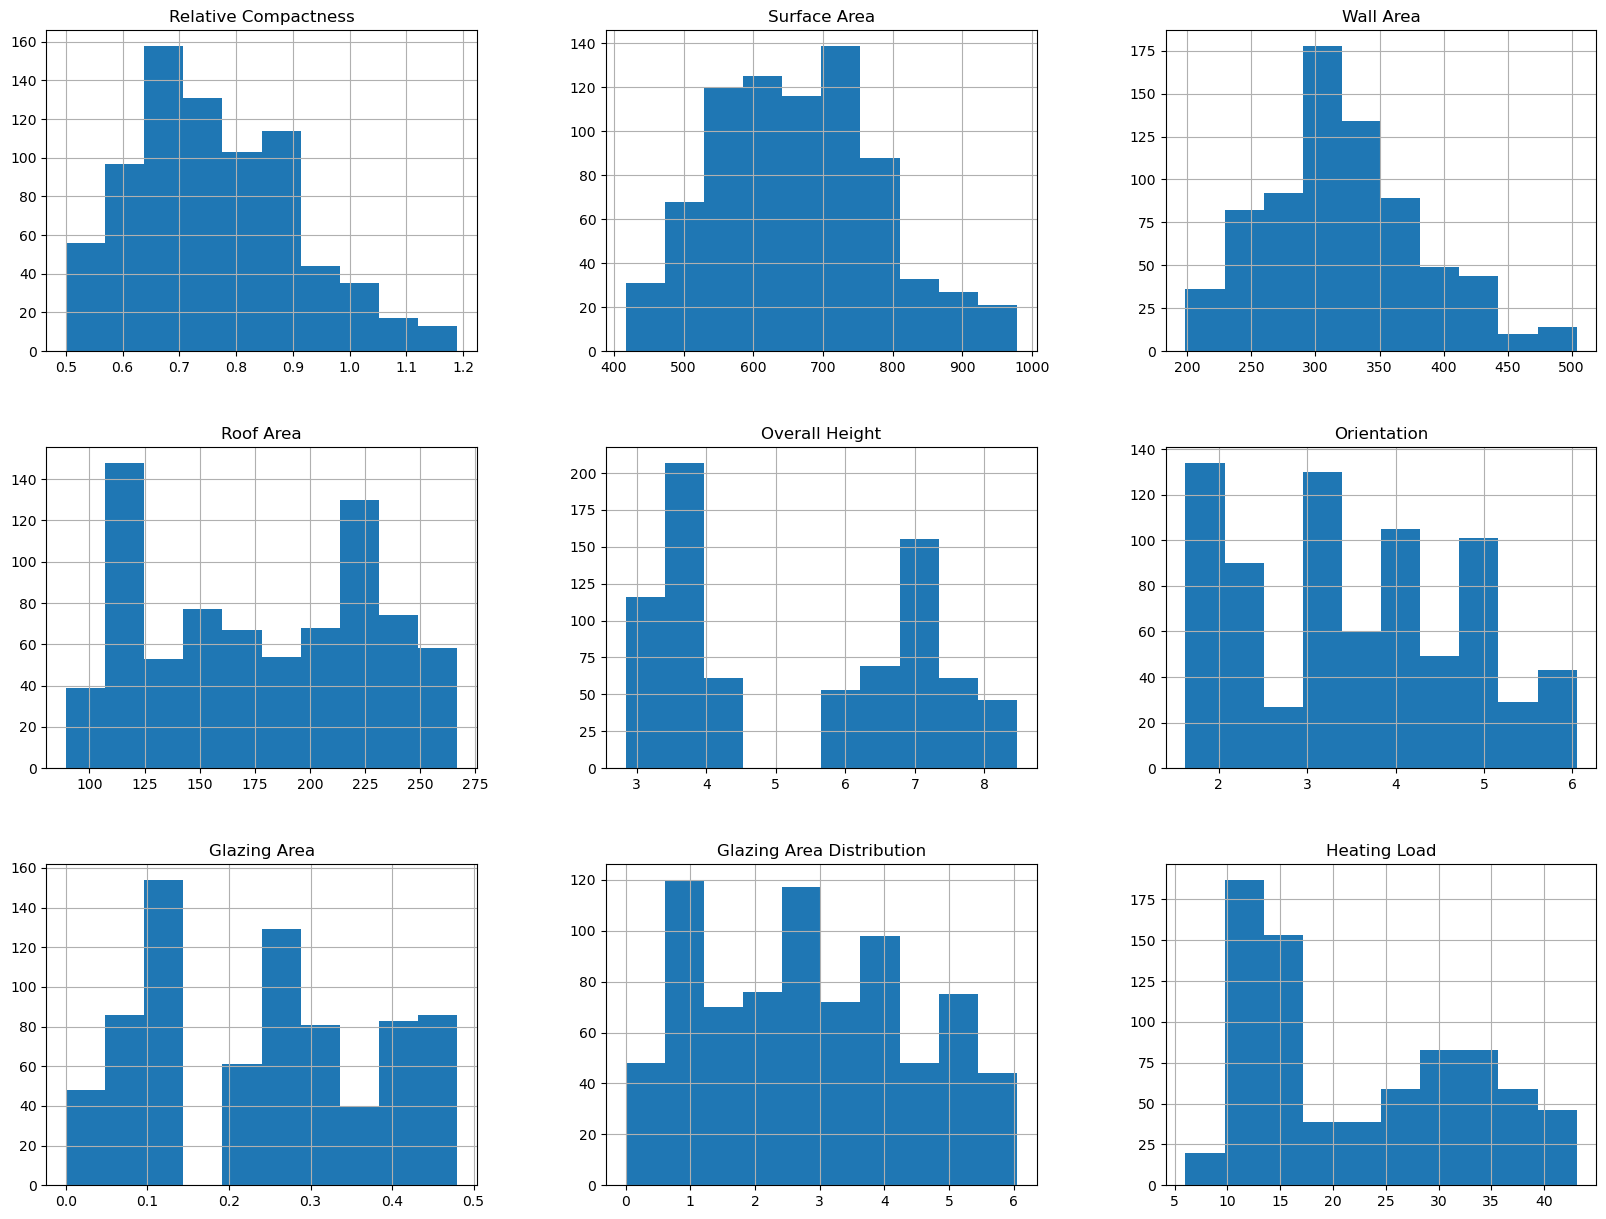

In [174]:
import matplotlib.pyplot as plt
dataset.hist(bins=10, figsize=(20,15))
plt.show()

### Histogram Interpretation

Column                          Histogram Type
______________________________________________

1.  Relative Compactness        Skew Right
2.  Surface Area           
3.  Wall Area                
4.  Roof Area                   Non-Symmetric Bimodal Distribution 
5.  Overall Height              Non-Symmetric Bimodal Distribution            
6.  Orientation               
7.  Glazing Area               
8.  Glazing Area Distribution  
9. Heating Load       

<AxesSubplot: >

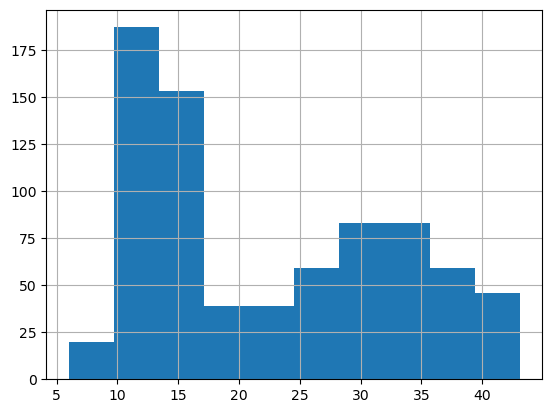

In [175]:
dataset['Heating Load'].hist()

#### Scattered Matrix of the full data frame

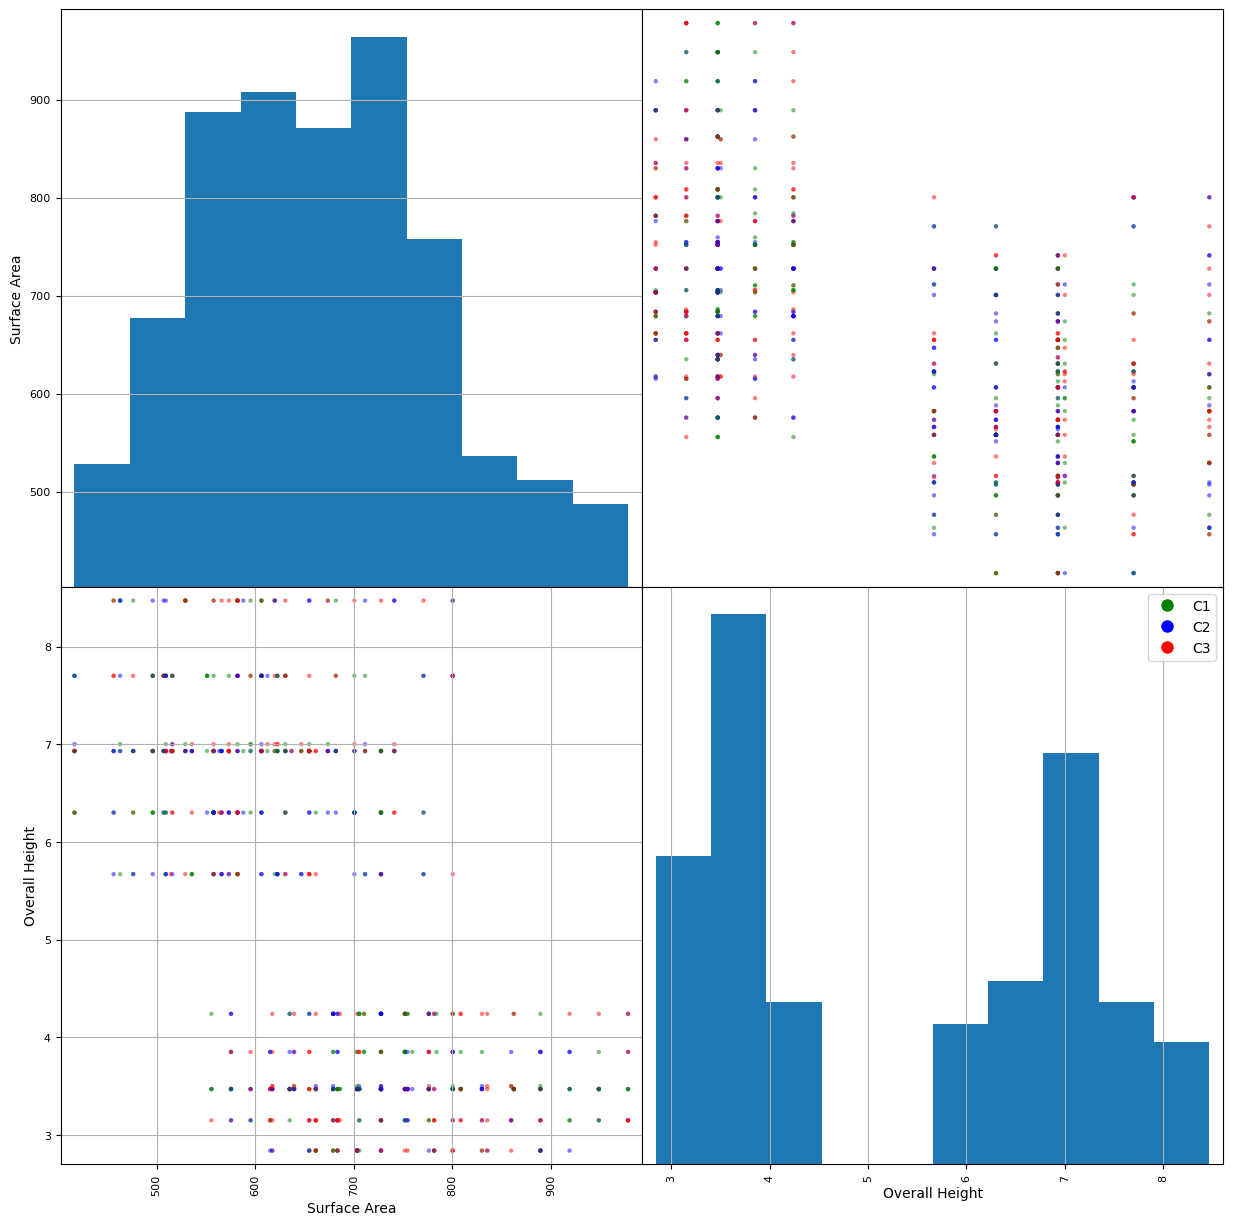

In [176]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt

# "Overall Height", "Glazing Area","Glazing Area Distribution", "Orientation",
attributes = ["Surface Area", "Overall Height", "Category of the Building"]

# select the attributes and map the stage colors
X = dataset[attributes]
cm = {'C1': 'green', 'C2': 'blue', 'C3': 'red'}
colors = X['Category of the Building'].map(cm)

# create a numpy array of RGBA color tuples for each data point
rgba_colors = [to_rgba(c) for c in colors]

# create a scatter matrix with smaller font size and smaller dots
plt.rcParams.update({'font.size': 10})
scatter_matrix(X, figsize=(15, 15), color=rgba_colors, s=40, grid=True)

# create a legend based on the colors and categories
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=value, markersize=10) for key, value in cm.items()]

plt.legend(handles=legend_elements, loc='upper right')
# add grid to each subplot
for ax in plt.gcf().axes:
    ax.grid(True)
    
plt.show()


array([[<AxesSubplot: title={'center': 'Overall Height'}>,
        <AxesSubplot: title={'center': 'Heating Load'}>]], dtype=object)

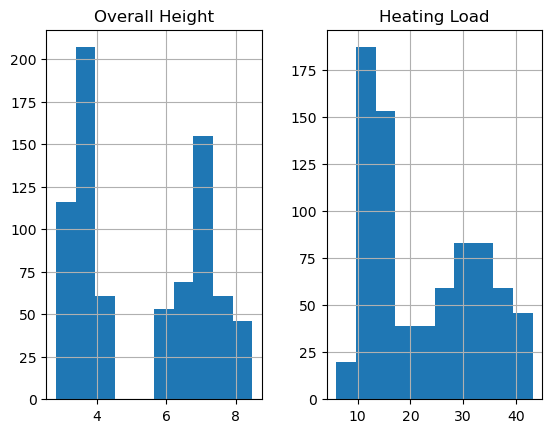

In [177]:
dataset[['Overall Height', 'Heating Load']].hist()


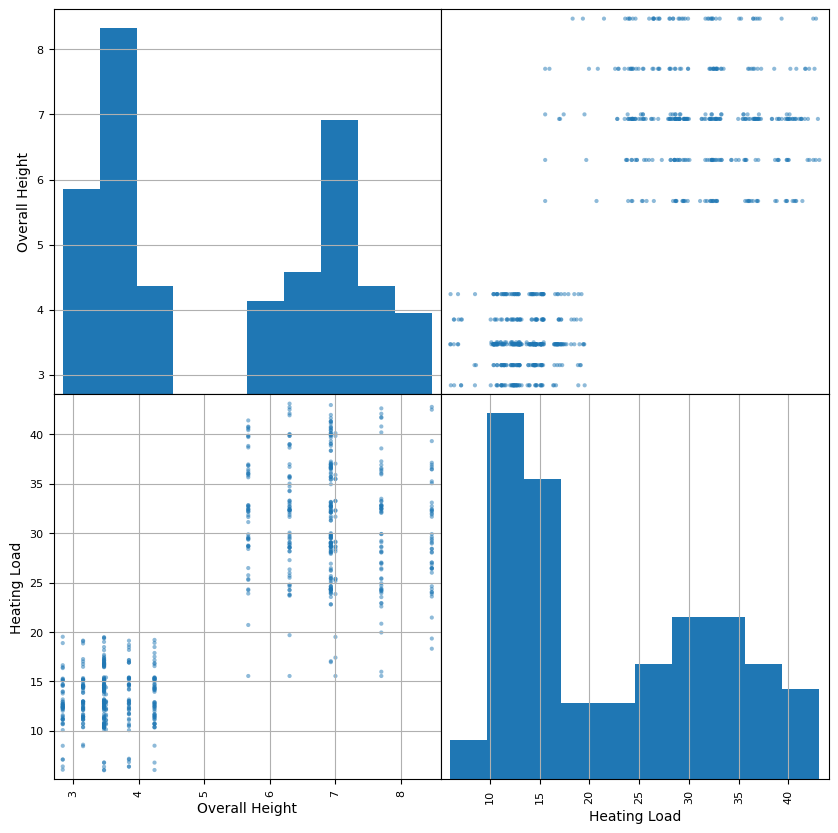

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

axes = scatter_matrix(dataset[['Overall Height', 'Heating Load']], figsize=(10, 10), diagonal='hist')

# Add grids to each subplot
for ax in axes.flatten():
    ax.grid()

# Show the plot
plt.show()


 ### Full Dataset Scattered Matrix - Seaborn Library

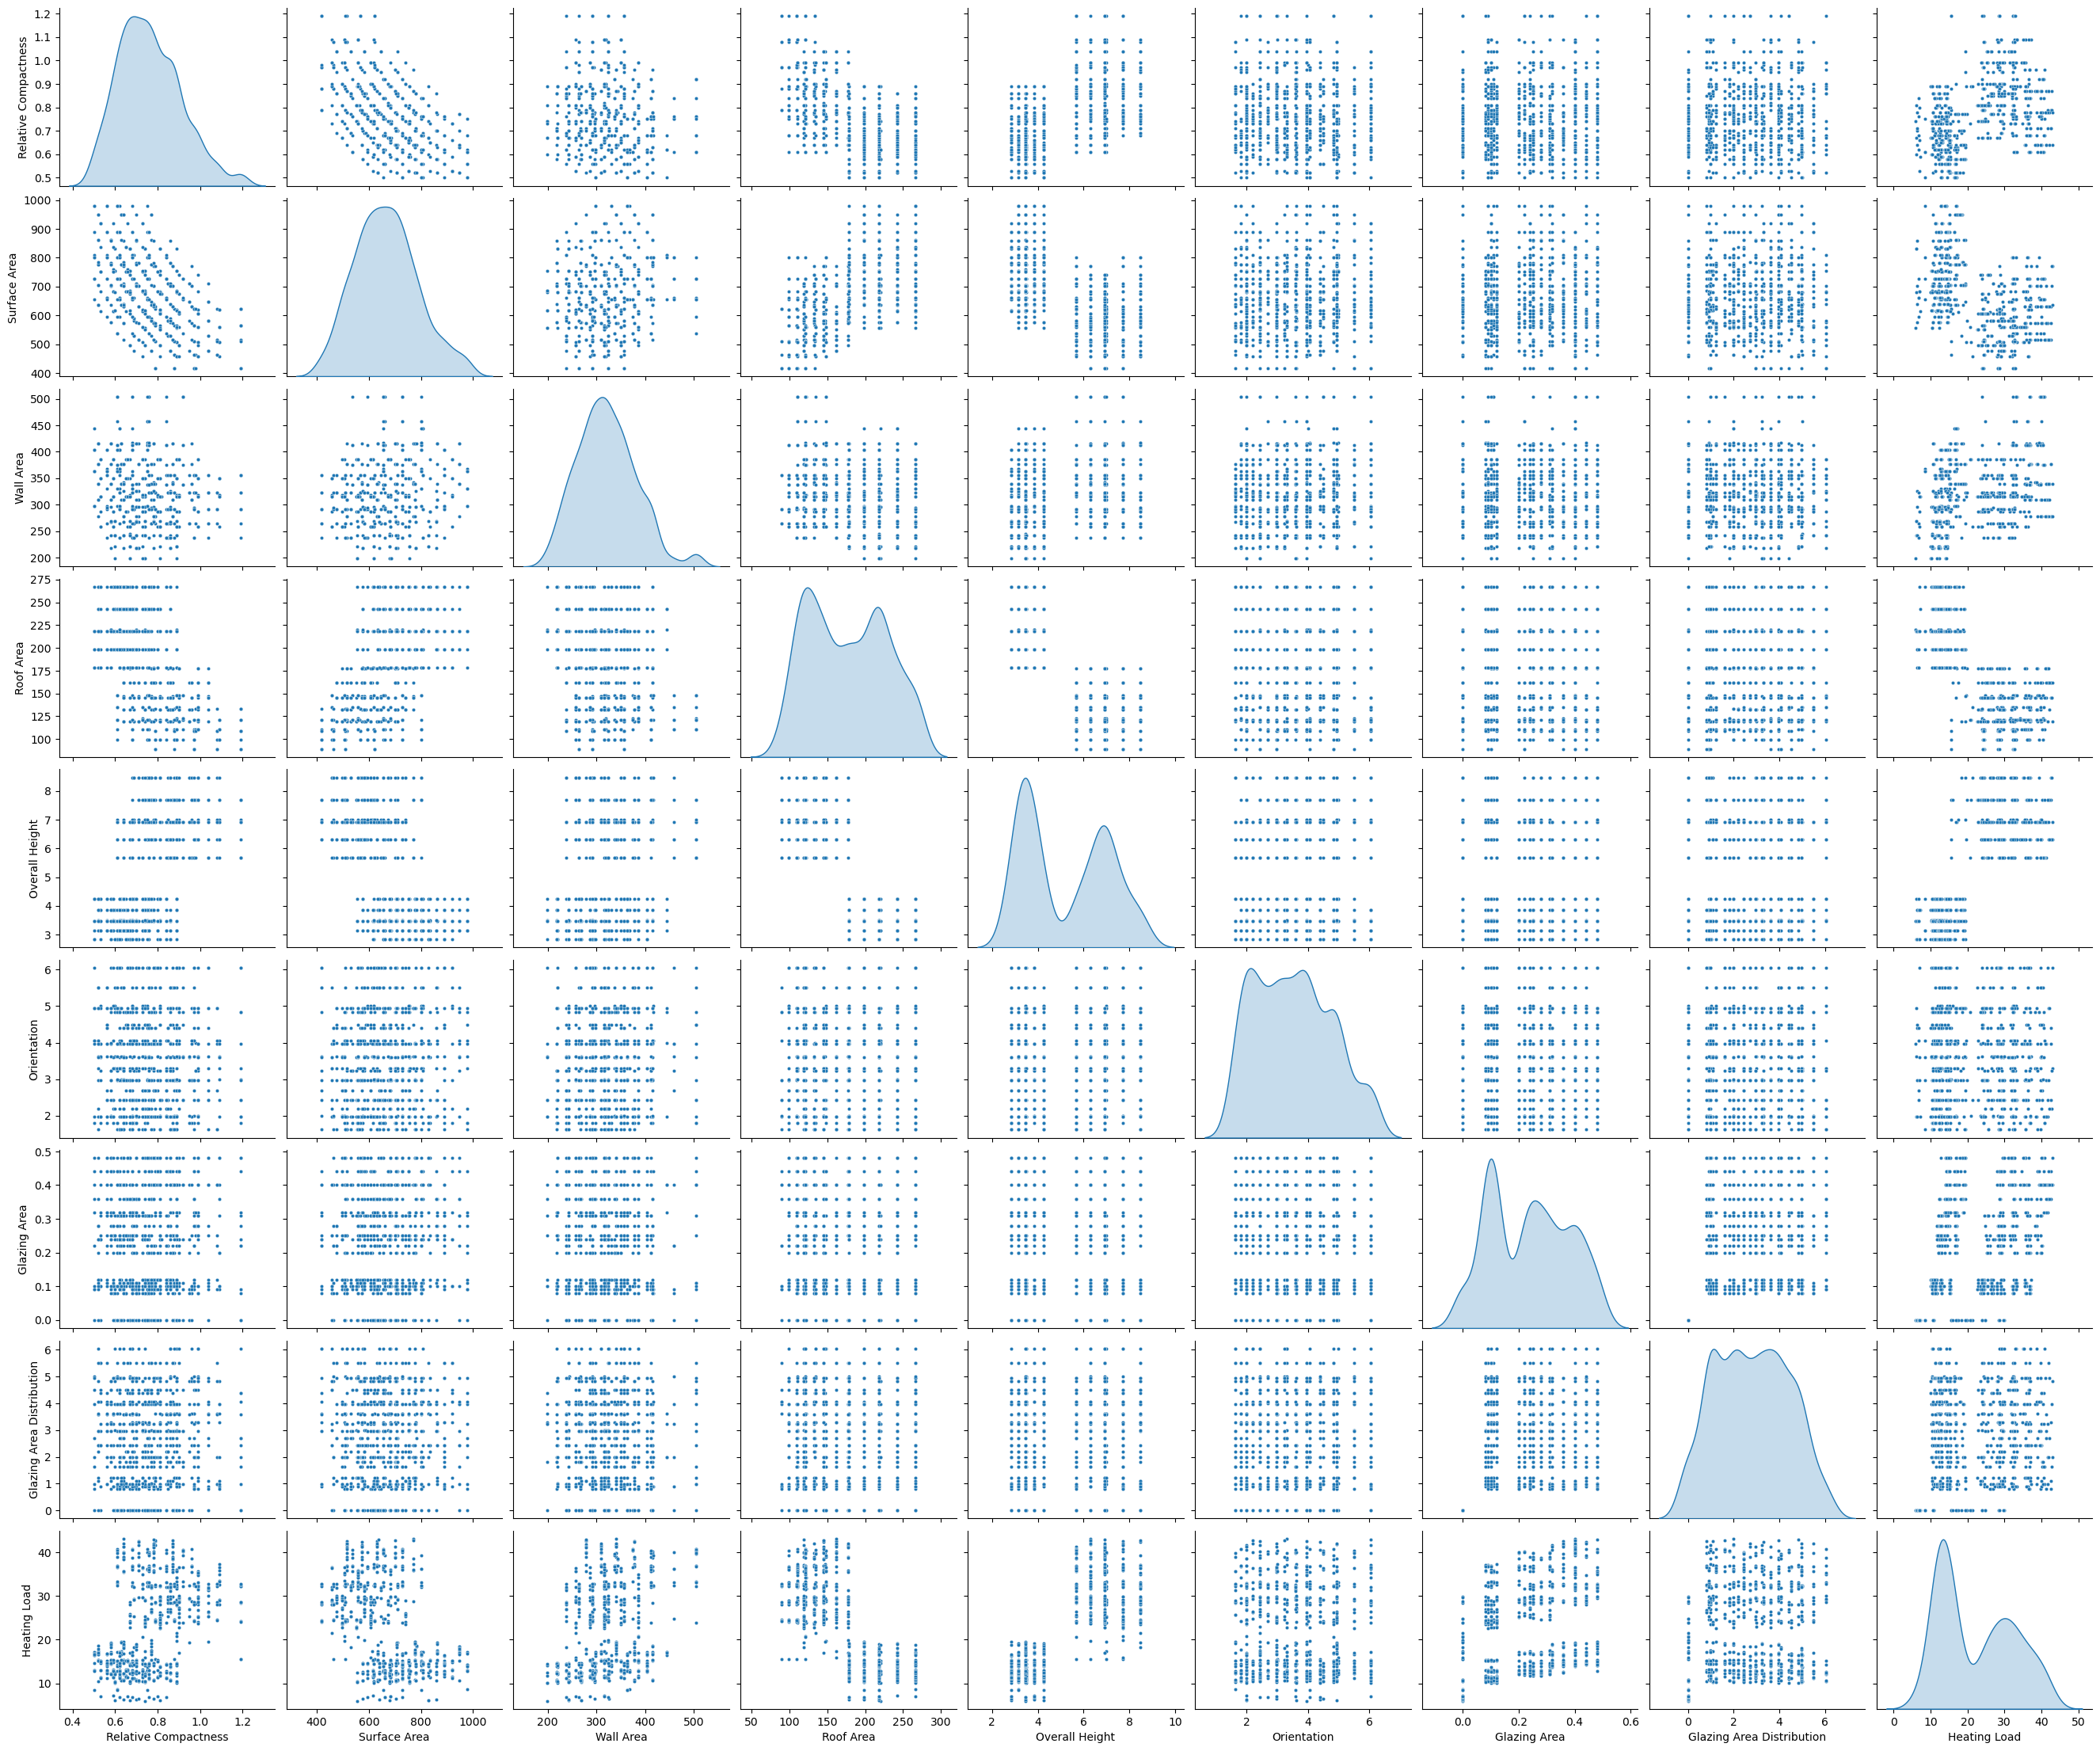

In [179]:
import seaborn as sns

sns.pairplot(dataset, height=2.5, aspect=1.2, diag_kind='kde', plot_kws=dict(s=10), diag_kws=dict(fill=True))

### Building Category Histogram

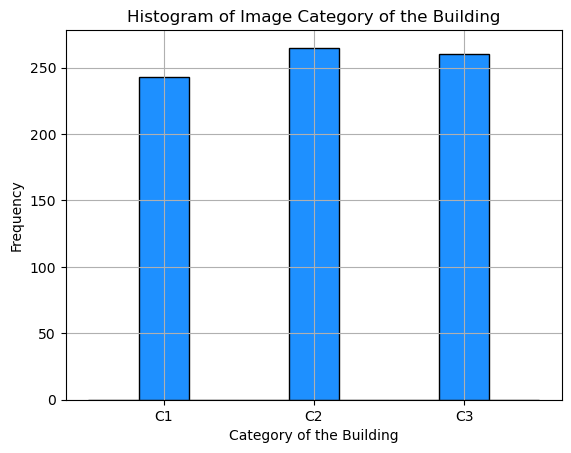

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of the categories
category_order = ['C1', 'C2', 'C3']

# Group the data by category
groups = dataset.groupby('Category of the Building')

# Create a histogram for each category in the specified order
for category in category_order:
    group = groups.get_group(category)
    plt.hist(group['Category of the Building'], bins=3, color='dodgerblue', edgecolor='black', label=category)

# Add grids to the plot
plt.grid(True)

# Add labels and a title to the plot
plt.xlabel('Category of the Building')
plt.ylabel('Frequency')
plt.title('Histogram of Image Category of the Building')



# Show the plot
plt.show()


## II. Data pre-processing

### a. Creating Test Set

In [181]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [182]:
# split the data into train and test sets, for model training and evaluation, respectively
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)

### c. Looking For Correlations

In [183]:
correlationMatrix = dataset.corr()
print(correlationMatrix.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_1179/879598923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = dataset.corr()


In [184]:
correlationMatrix["Heating Load"].sort_values(ascending=False)

Heating Load                 1.000000
Overall Height               0.815769
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Surface Area                -0.481192
Roof Area                   -0.771040
Name: Heating Load, dtype: float64

#### Looking to compare the strenghts of the correlation with the absolute values instead

In [185]:
correlationMatrix = abs(correlationMatrix["Heating Load"])
correlationMatrix_sorted = correlationMatrix.sort_values(ascending=False)
print(correlationMatrix_sorted)

Heating Load                 1.000000
Overall Height               0.815769
Roof Area                    0.771040
Surface Area                 0.481192
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Name: Heating Load, dtype: float64


### Worth dropping Glazing Area Distribution and/or Orientation due to the most minimal correlation values.        
reverted dropping these vals, as it affected the neural network:, "Glazing Area Distribution", "Orientation"

In [186]:
dataset = train_set.drop(columns=["Heating Load"])
dataset_labels = train_set["Heating Load"].copy()


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 334 to 102
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the Building   537 non-null    object 
 1   Relative Compactness       537 non-null    float64
 2   Surface Area               537 non-null    float64
 3   Wall Area                  511 non-null    float64
 4   Roof Area                  537 non-null    float64
 5   Overall Height             537 non-null    float64
 6   Orientation                537 non-null    float64
 7   Glazing Area               537 non-null    float64
 8   Glazing Area Distribution  537 non-null    float64
dtypes: float64(8), object(1)
memory usage: 42.0+ KB


In [188]:
dataset

Category of the Building  Relative Compactness  Surface Area  Wall Area  \
334                       C3                  0.61        800.42     363.82   
139                       C3                  0.63        705.60     339.57   
485                       C2                  0.99        557.86     315.32   
547                       C1                  0.71        630.63     339.57   
18                        C2                  0.71        630.63     377.30   
..                       ...                   ...           ...        ...   
71                        C2                  0.75        654.89     416.50   
106                       C2                  1.04        582.12     291.06   
270                       C2                  0.86        575.51     326.10   
435                       C2                  0.97        509.36     355.74   
102                       C3                  0.99        557.86     257.98   

     Roof Area  Overall Height  Orientation  Glazing Area  \
334     242.55            2.84         3.96          0.24   
139     198.45            3.85         6.05          0.10   
485     110.25            6.30         3.30          0.28   
547     119.07            7.70         6.05          0.36   
18      119.07            5.67         3.60          0.00   
..         ...             ...          ...           ...   
71      121.28            8.47         4.05          0.09   
106     161.70            7.70         3.96          0.09   
270     242.55            3.47         4.84          0.12   
435     109.15            6.93         6.05          0.31   
102     110.25            6.30         3.96          0.08   

     Glazing Area Distribution  
334                       0.99  
139                       1.98  
485                       5.00  
547                       0.99  
18                        0.00  
..                         ...  
71                        0.90  
106                       2.42  
270                       6.05  
435                       3.24  
102                       2.20  

[537 rows x 9 columns]

### Data Cleaning

### c. Missing Values

In [189]:
# Checking the data with missing values.
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head() 
sample_incomplete_rows


Category of the Building  Relative Compactness  Surface Area  Wall Area  \
333                       C1                  0.68        727.65        NaN   
417                       C1                  0.84        727.65        NaN   
453                       C1                  0.76        595.35        NaN   
88                        C2                  0.64        776.16        NaN   
0                         C3                  1.19        622.55        NaN   

     Roof Area  Overall Height  Orientation  Glazing Area  \
333     242.55            3.47         2.70          0.20   
417     266.80            3.85         2.97          0.25   
453      99.23            8.47         2.97          0.25   
88      242.55            3.85         1.80          0.10   
0        89.31            7.00         1.98          0.00   

     Glazing Area Distribution  
333                       0.99  
417                       3.63  
453                       3.24  
88                        1.10  
0                         0.00

In [190]:
missing_values= dataset.isnull().sum()
print(missing_values)

Category of the Building      0
Relative Compactness          0
Surface Area                  0
Wall Area                    26
Roof Area                     0
Overall Height                0
Orientation                   0
Glazing Area                  0
Glazing Area Distribution     0
dtype: int64


median is a good approach for missing values because it is robust, easy to calculate, minimizes bias, and is less affected by missing values.

Computing median and impute (fill in with median) the missing values.

In [191]:
median = dataset["Wall Area"].median()
sample_incomplete_rows["Wall Area"].fillna(median, inplace=True)

In [192]:
sample_incomplete_rows

Category of the Building  Relative Compactness  Surface Area  Wall Area  \
333                       C1                  0.68        727.65     315.32   
417                       C1                  0.84        727.65     315.32   
453                       C1                  0.76        595.35     315.32   
88                        C2                  0.64        776.16     315.32   
0                         C3                  1.19        622.55     315.32   

     Roof Area  Overall Height  Orientation  Glazing Area  \
333     242.55            3.47         2.70          0.20   
417     266.80            3.85         2.97          0.25   
453      99.23            8.47         2.97          0.25   
88      242.55            3.85         1.80          0.10   
0        89.31            7.00         1.98          0.00   

     Glazing Area Distribution  
333                       0.99  
417                       3.63  
453                       3.24  
88                        1.10  
0                         0.00

We can se above, that there are no missing values left after the median operation in the dataset.

In [193]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [194]:
dataset_num = dataset.drop("Category of the Building", axis=1)

Computing the statistics that will be used to replace missing values in the dataset.



In [195]:
imputer.fit(dataset_num)

SimpleImputer(strategy='median')

In [196]:
X = imputer.transform(dataset_num)

Createing a new Pandas DataFrame called dataset_tr from a NumPy array X, with the same column names and index labels as an existing DataFrame dataset_num.

In [197]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,index=dataset.index)

In [198]:
dataset_tr.loc[sample_incomplete_rows.index.values]

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
333                  0.68        727.65     315.32     242.55            3.47   
417                  0.84        727.65     315.32     266.80            3.85   
453                  0.76        595.35     315.32      99.23            8.47   
88                   0.64        776.16     315.32     242.55            3.85   
0                    1.19        622.55     315.32      89.31            7.00   

     Orientation  Glazing Area  Glazing Area Distribution  
333         2.70          0.20                       0.99  
417         2.97          0.25                       3.63  
453         2.97          0.25                       3.24  
88          1.80          0.10                       1.10  
0           1.98          0.00                       0.00

In [199]:
imputer.strategy

'median'

In [200]:
dataset_tr.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
334                  0.61        800.42     363.82     242.55            2.84   
139                  0.63        705.60     339.57     198.45            3.85   
485                  0.99        557.86     315.32     110.25            6.30   
547                  0.71        630.63     339.57     119.07            7.70   
18                   0.71        630.63     377.30     119.07            5.67   

     Orientation  Glazing Area  Glazing Area Distribution  
334         3.96          0.24                       0.99  
139         6.05          0.10                       1.98  
485         3.30          0.28                       5.00  
547         6.05          0.36                       0.99  
18          3.60          0.00                       0.00

### d. Handling Categorical Atributes

In [201]:
dataset_Categorical = dataset[["Category of the Building"]]
dataset_Categorical.head()

Category of the Building
334                       C3
139                       C3
485                       C2
547                       C1
18                        C2

### Using One-Hot Encoding, as the categorical values are not ordinal.

In [202]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()
dataset_Categorical_1Hot = category_encoder.fit_transform(dataset_Categorical)
dataset_Categorical_1Hot

<537x3 sparse matrix of type '<class 'numpy.float64'>'
	with 537 stored elements in Compressed Sparse Row format>

In [203]:
dataset_Categorical_1Hot.shape

(537, 3)

In [204]:
dataset_Categorical_1Hot.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Transformation Pipeline creation

In [205]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

dataset_num_tr = num_pipeline.fit_transform(dataset_num)

In [206]:
dataset_num_tr

array([[-1.03443078,  1.07099616,  0.74848195, ...,  0.35749091,
         0.00490148, -1.16327892],
       [-0.89814782,  0.29534228,  0.33497246, ...,  2.08630327,
        -0.99102645, -0.54348139],
       [ 1.55494538, -0.91321187, -0.07853703, ..., -0.18844984,
         0.28945232,  1.34721409],
       ...,
       [ 0.66910617, -0.76882997,  0.10528286, ...,  1.0854119 ,
        -0.84875103,  2.00457511],
       [ 1.41866242, -1.30995531,  0.61070229, ...,  2.08630327,
         0.50286545,  0.24535182],
       [ 1.55494538, -0.91321187, -1.05629515, ...,  0.35749091,
        -1.13330187, -0.40574861]])

Transformoing numerical and categorical values to the full pipeline

In [207]:
from sklearn.compose import ColumnTransformer
import pandas as pd

num_attribs = list(dataset_num)
cat_attribs = ["Category of the Building"]
y_train = train_set['Heating Load']
train_set.drop('Heating Load',inplace=True, axis=1)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_dataset_prepared = full_pipeline.fit_transform(train_set)

# III. Models training and optimisation

# a. Simple Linear Regression

In [208]:
# fitting a simple linear regression to predict Heating Load

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_dataset_prepared, y_train) 

LinearRegression()

### Test set or evaluate the Linear Regression model

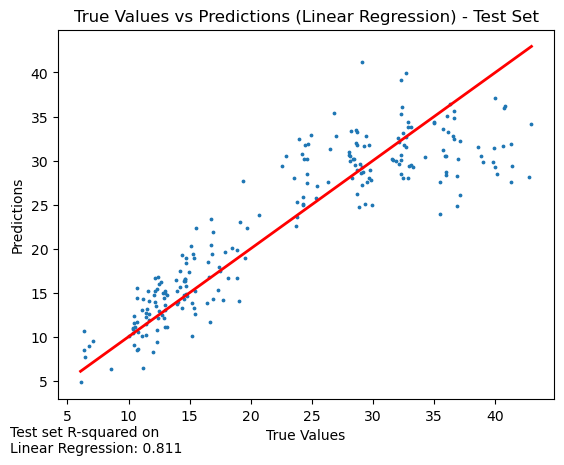

In [209]:
import matplotlib.pyplot as plt

# Prepare the test set
y_test = test_set["Heating Load"].copy()
test_set.drop("Heating Load", inplace=True, axis=1)
test_dataset_prepared = full_pipeline.transform(test_set)

# Make predictions on the test set
test_predictions = lin_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = lin_reg.score(test_dataset_prepared, y_test)

# Scatter plot of true values vs predictions for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Linear Regression) - Test Set")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.text(0.05, 0, f"Test set R-squared on\nLinear Regression: {test_accuracy:.3f}", fontsize=10, transform=plt.gcf().transFigure)
plt.show()

Coefficient of determination- a statistical metric used to evaluate the performance of the linear regression model.

In [210]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, lin_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.3f}")
print(f"Test set R-squared: {test_r2:.3f}")


Training set R-squared: 0.799
Test set R-squared: 0.811


### Mean Squared Error on Linear Regression

In [211]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, lin_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, lin_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4605726367564134
Test MAE: 3.254994153023239
Training RMSE: 4.522586051646868
Test RMSE: 4.376936791001055


### Linear Regression - Cross Validation

In [212]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

Performing 10-fold cross-validation on a linear regression model

In [213]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, train_dataset_prepared, dataset_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)


Scores: [4.60057551 4.25456237 4.99290609 4.58111705 4.91948389 4.33629243
 4.83667201 5.07503353 5.05877518 3.49221081]
Mean: 4.614762886444051
Standard deviation: 0.4650627402856163


### Linear Regression Fine-Tune

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Linear Regression
param_grid = [
    {'linear_regression__fit_intercept': [True, False]}
]

# Create the Linear Regression model inside a pipeline
lin_reg_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lin_reg_pipeline, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'linear_regression__fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

output of the grid sarch best parameter combination.

In [215]:
# Get the best parameters
grid_search.best_params_


{'linear_regression__fit_intercept': True}

In [216]:
# Get the best Linear Regression model
grid_search.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [217]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621892424970538 {'linear_regression__fit_intercept': True}
22.548613762350396 {'linear_regression__fit_intercept': False}


In [218]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006874      0.001920         0.002232        0.001335   
1       0.007962      0.002843         0.002169        0.001061   

  param_linear_regression__fit_intercept  \
0                                   True   
1                                  False   

                                        params  split0_test_score  \
0   {'linear_regression__fit_intercept': True}         -19.026531   
1  {'linear_regression__fit_intercept': False}        -530.474958   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0         -23.145038         -21.849152         -24.059344  ...   
1        -528.670230        -490.179783        -505.618097  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0       -21.361890        2.148362                1          -20.880708   
1      -508.439983       18.357158                2         -519.684516   

   split1_train_score  split2_train_score  split3_train_score  \
0          -19.962273          -20.235542          -19.689240   
1         -493.467989         -490.723090         -510.933166   

   split4_train_score  mean_train_score  std_train_score  
0          -21.006819        -20.354916         0.512441  
1         -518.458637       -506.653480        12.289181  

[2 rows x 21 columns]

### System Evaluation on the Test Set- Linear Regression

In [219]:
final_model = grid_search.best_estimator_

X_test = test_set
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_LinReg_final_rmse = np.sqrt(final_mse)

In [220]:
_LinReg_final_rmse

4.3769367910010555

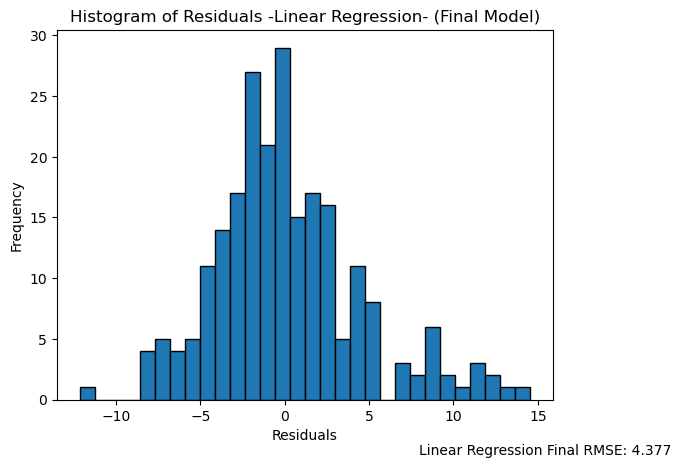

In [221]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Linear Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Linear Regression Final RMSE: {_LinReg_final_rmse:.3f}")

plt.show()


## b. Ridge Regression

Fitting in the ridge regression model

In [222]:
from sklearn.linear_model import Ridge

# Fit the Ridge Regression model
ridge_reg = Ridge(alpha=10, solver="saga", random_state=42)
ridge_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

Ridge(alpha=10, random_state=42, solver='saga')

Adding SGDRegressor because the penalty="l2" parameter is not in the Ridge regression block because Ridge regression inherently uses L2 regularization

In [223]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=1, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())
sgd_reg.predict(train_dataset_prepared)

array([14.95630795, 17.33408186, 29.04860784, 29.37063164, 23.82955946,
       24.73215367, 15.2675208 , 17.38643248, 12.38073542, 32.76516345,
       14.39993385, 25.2078128 , 27.49410678, 29.99232688, 16.87745262,
       17.28870894, 28.55634192, 19.63568541, 28.61686212, 16.75033756,
       16.28850525, 26.82569427, 28.73910029, 21.27067563, 14.36756233,
       27.37800626, 18.87932018, 20.70062427, 19.21059557, 16.43032502,
       16.72981425, 18.99404787, 14.12600868, 15.21882626, 28.73258961,
       24.7686427 , 26.95573457, 12.33609933, 29.31545376, 28.24492806,
       28.2036848 , 24.44360299, 14.58641908, 15.04144158, 12.21052774,
       16.40773528, 16.24282484, 19.59611924, 19.49601069, 16.7954247 ,
       14.55638613, 25.39129904, 15.07917571, 13.72792103, 27.60725112,
       31.89543707, 17.88222413, 17.98734955, 13.76271924, 19.81301027,
       14.73264306, 15.45342259, 30.19998967, 27.26047258, 26.21927827,
       20.68866484, 24.70644479, 22.45755869, 19.98632826, 25.75

### Test set to evaluate the Ridge Regression model

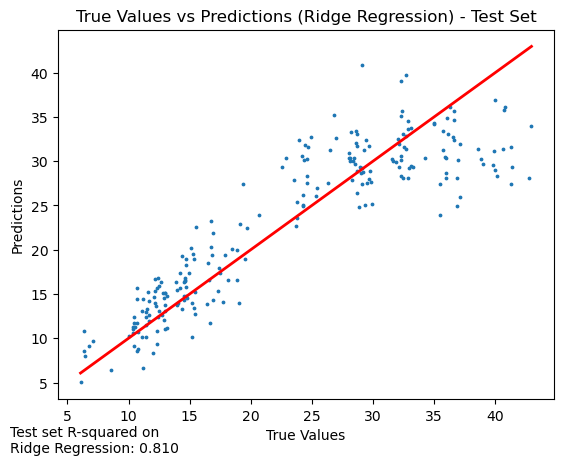

In [224]:
import matplotlib.pyplot as plt

# # Prepare the test set

test_predictions = ridge_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = ridge_reg.score(test_dataset_prepared, y_test)

# Calculate R-squared on the test set
test_accuracy = ridge_reg.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Ridge Regression) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nRidge Regression: {test_accuracy:.3f}", fontsize=10, transform=plt.gcf().transFigure)


plt.show()

### Performance evaluation using R-squared - Ridge Regression

In [225]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, ridge_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.3f}")
print(f"Test set R-squared: {test_r2:.3f}")

Training set R-squared: 0.798
Test set R-squared: 0.810


### Mean Square Error on Ridge Regression

In [226]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, ridge_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, ridge_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4563971474694415
Test MAE: 3.2733029621765386
Training RMSE: 4.524918093862812
Test RMSE: 4.39214631900787


### Ridge Regression- Cross Validation

In [227]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [228]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Fit the Ridge Regression model
ridge_reg = Ridge(alpha=10, solver="saga", random_state=42)
ridge_reg.fit(train_dataset_prepared, y_train)

# Cross-validation for Ridge Regression
ridge_scores = cross_val_score(ridge_reg, train_dataset_prepared, y_train,
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

display_scores(ridge_rmse_scores)


Scores: [4.61746079 4.21921085 5.03039202 4.6070268  4.90567523 4.34549719
 4.81769173 5.03458516 5.07087962 3.48144162]
Mean: 4.612986100891609
Standard deviation: 0.46864367891039105


In [229]:
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid for Ridge Regression
param_grid_ridge = [
    {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
]

# Parameter grid for SGDRegressor
param_grid_sgd = [
    {'penalty': ['l2', 'L1'], 'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'random_state': [42]}
]

ridge_reg = Ridge(random_state=42)
sgd_reg = SGDRegressor()

# Grid search for Ridge Regression
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, n_jobs=-1,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)
grid_search_ridge.fit(train_dataset_prepared, y_train.ravel())

# Grid search for SGDRegressor
grid_search_sgd = GridSearchCV(sgd_reg, param_grid_sgd, cv=5, n_jobs=-1,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search_sgd.fit(train_dataset_prepared, y_train.ravel())


/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1585, in fit
    self._validate_params()
  File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/base.py", line 570, in _validate_params
    vali

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2', 'L1'], 'random_state': [42]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [230]:
# Get the best parameters
grid_search.best_params_


{'linear_regression__fit_intercept': True}

In [231]:
# Get the best Linear Regression model
grid_search.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

#### Grid Search Results

In [232]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621892424970538 {'linear_regression__fit_intercept': True}
22.548613762350396 {'linear_regression__fit_intercept': False}


In [233]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006874      0.001920         0.002232        0.001335   
1       0.007962      0.002843         0.002169        0.001061   

  param_linear_regression__fit_intercept  \
0                                   True   
1                                  False   

                                        params  split0_test_score  \
0   {'linear_regression__fit_intercept': True}         -19.026531   
1  {'linear_regression__fit_intercept': False}        -530.474958   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0         -23.145038         -21.849152         -24.059344  ...   
1        -528.670230        -490.179783        -505.618097  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0       -21.361890        2.148362                1          -20.880708   
1      -508.439983       18.357158                2         -519.684516   

   split1_train_score  split2_train_score  split3_train_score  \
0          -19.962273          -20.235542          -19.689240   
1         -493.467989         -490.723090         -510.933166   

   split4_train_score  mean_train_score  std_train_score  
0          -21.006819        -20.354916         0.512441  
1         -518.458637       -506.653480        12.289181  

[2 rows x 21 columns]

In [234]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621892424970538 {'linear_regression__fit_intercept': True}
22.548613762350396 {'linear_regression__fit_intercept': False}


### System Evaluation on the Test Set- Ridge Regression

In [235]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_RidgeReg_final_rmse = np.sqrt(final_mse)

In [236]:
_RidgeReg_final_rmse

4.3769367910010555

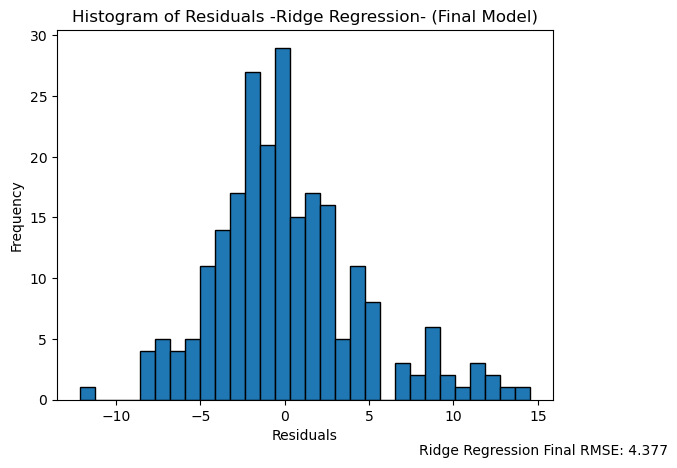

In [237]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Ridge Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Ridge Regression Final RMSE: {_RidgeReg_final_rmse:.3f}")

plt.show()

### Using Stochastic Gradient Descent

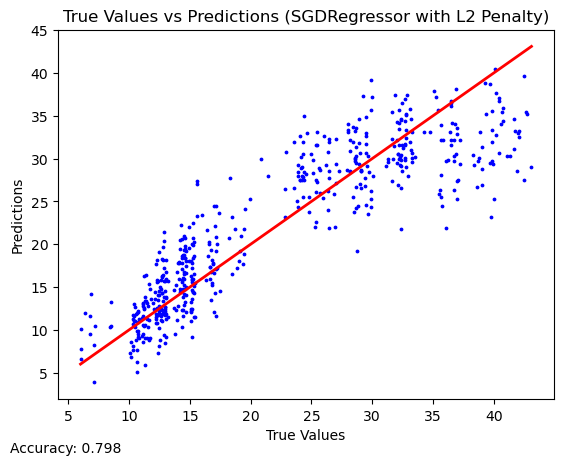

In [238]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import pandas as pd

sgd_reg = SGDRegressor(penalty="l2", alpha=0.01, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())

predictions = sgd_reg.predict(train_dataset_prepared)

# Calculate accuracy using score() method
accuracy = sgd_reg.score(train_dataset_prepared, y_train)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions, s=3, c='blue', label='Predictions')  # Set the marker size to a smaller value and color to blue

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (SGDRegressor with L2 Penalty)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

# Print accuracy at the bottom of the plot
plt.text(0.05, 0, f"Accuracy: {accuracy:.3f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()




##  c. Lasso Regression

Fitting in the Lasso model

In [239]:
from sklearn.linear_model import Lasso

# Fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(train_dataset_prepared, y_train)

Lasso(alpha=0.1, random_state=42)

In [240]:
# Here are the coefficient(s) of the Lasso model: 

lasso_reg.coef_

array([-0.05337953, -0.58300477,  1.64633086, -2.57829223,  5.44434507,
       -0.11134123,  2.65327565,  0.15560824, -0.        , -0.        ,
        0.03749887])

Stochastic Gradient Descent algorithm to fit a linear model with L1 regularization penalty and a regularization parameter.

In [241]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, tol=0.001, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())
sgd_reg.predict(train_dataset_prepared)

array([12.56120589, 14.77178611, 30.1449292 , 34.47765363, 23.51138423,
       28.76258975, 12.11938055, 15.79888793,  8.13389898, 36.09854467,
        9.10632834, 28.14545506, 29.77143355, 35.47826167, 12.1512964 ,
       16.0822132 , 30.88949114, 18.97507531, 32.88900297, 15.64671203,
       13.0913529 , 30.49766473, 33.94106989, 21.07019313,  9.83071233,
       26.79137544, 17.99088228, 21.65461618, 19.12186946, 13.85446041,
       14.74600735, 16.04283076, 12.85185719, 12.12433498, 32.49140743,
       26.97070618, 30.49882745,  8.10142991, 30.35729358, 33.16612086,
       32.00228529, 25.47164631, 12.81181925, 11.76649042, 10.47677191,
       12.31631773, 13.08439711, 18.14324598, 18.89287645, 14.04570104,
       11.6288151 , 27.64993631, 12.23962741, 10.13243652, 29.43243728,
       35.04362037, 16.98182808, 18.02836445,  9.5005034 , 19.17753648,
       11.9454221 ,  9.65975442, 36.26384832, 30.57524032, 26.46999121,
       20.8414247 , 24.69103945, 23.65909316, 17.9968338 , 26.94

### Test set to evaluate the Lasso Regression model

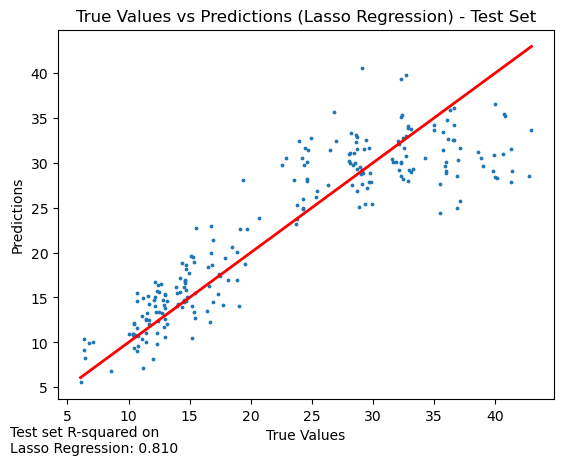

In [242]:
# Prepare the test set
# test_dataset = test_set.drop("Heating Load", axis=1)
# y_test = test_set["Heating Load"].copy()

test_predictions = lasso_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = lasso_reg.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Lasso Regression) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nLasso Regression: {test_accuracy:.3f}", fontsize=10, transform=plt.gcf().transFigure)


plt.show()

### Performance evaluation using R-squared - Lasso Regression

In [243]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, lasso_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.3f}")
print(f"Test set R-squared: {test_r2:.3f}")



Training set R-squared: 0.797
Test set R-squared: 0.810


### Mean Square Error on Lasso Regression

In [244]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, lasso_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, lasso_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4543421115261714
Test MAE: 3.2634997900861156
Training RMSE: 4.539008876004815
Test RMSE: 4.389240664698885


### Lasso Regression- Cross Validation

In [245]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [246]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Fit the Lasso Regression model
lasso_reg = Lasso(alpha=1, random_state=42)
lasso_reg.fit(train_dataset_prepared, y_train)

# Cross-validation for Lasso Regression
lasso_scores = cross_val_score(lasso_reg, train_dataset_prepared, y_train,
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)

display_scores(lasso_rmse_scores)


Scores: [4.89617077 4.04996835 5.60835203 4.9564281  5.21307306 5.17115055
 4.92897993 5.10220324 5.47690586 3.49409561]
Mean: 4.889732750055808
Standard deviation: 0.6122999173547062


In [247]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso Regression
param_grid = [
    {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1e-3, 1e-4, 1e-5]}
]

# Create the Lasso Regression model
lasso_reg = Lasso(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train)


GridSearchCV(cv=5, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'tol': [0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [248]:
grid_search.best_params_

{'alpha': 0.001, 'tol': 1e-05}

In [249]:
grid_search.best_estimator_

Lasso(alpha=0.001, random_state=42, tol=1e-05)

### Grid Searh Results

In [250]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621652080585687 {'alpha': 0.001, 'tol': 0.001}
4.621604898194103 {'alpha': 0.001, 'tol': 0.0001}
4.62160411294203 {'alpha': 0.001, 'tol': 1e-05}
4.621661523976528 {'alpha': 0.01, 'tol': 0.001}
4.621646757480323 {'alpha': 0.01, 'tol': 0.0001}
4.621654152116917 {'alpha': 0.01, 'tol': 1e-05}
4.624649671324069 {'alpha': 0.1, 'tol': 0.001}
4.624505525288874 {'alpha': 0.1, 'tol': 0.0001}
4.624467122371191 {'alpha': 0.1, 'tol': 1e-05}
4.934046371571201 {'alpha': 1, 'tol': 0.001}
4.934158141379346 {'alpha': 1, 'tol': 0.0001}
4.934172157930856 {'alpha': 1, 'tol': 1e-05}
10.110627932076403 {'alpha': 10, 'tol': 0.001}
10.110627932076403 {'alpha': 10, 'tol': 0.0001}
10.110627932076403 {'alpha': 10, 'tol': 1e-05}
10.110627932076403 {'alpha': 100, 'tol': 0.001}
10.110627932076403 {'alpha': 100, 'tol': 0.0001}
10.110627932076403 {'alpha': 100, 'tol': 1e-05}


In [251]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.002381      0.000198         0.000981        0.000472       0.001   
1        0.003036      0.000493         0.000785        0.000186       0.001   
2        0.002645      0.000540         0.000675        0.000128       0.001   
3        0.003095      0.000985         0.000927        0.000279        0.01   
4        0.003583      0.001558         0.000732        0.000141        0.01   
5        0.002479      0.000551         0.000881        0.000291        0.01   
6        0.005474      0.004886         0.001098        0.000366         0.1   
7        0.003031      0.000400         0.001070        0.000301         0.1   
8        0.004336      0.002925         0.000863        0.000395         0.1   
9        0.003810      0.002527         0.000791        0.000141           1   
10       0.007941      0.010333         0.000910        0.000176           1   
11       0.004887      0.004503         0.002529        0.002744           1   
12       0.002462      0.000241         0.000739        0.000099          10   
13       0.004634      0.001714         0.002062        0.001820          10   
14       0.004233      0.002638         0.001011        0.000457          10   
15       0.003118      0.000727         0.001105        0.000407         100   
16       0.002256      0.000216         0.000944        0.000236         100   
17       0.002936      0.001317         0.000970        0.000241         100   

   param_tol                           params  split0_test_score  \
0      0.001   {'alpha': 0.001, 'tol': 0.001}         -19.022464   
1     0.0001  {'alpha': 0.001, 'tol': 0.0001}         -19.021368   
2    0.00001   {'alpha': 0.001, 'tol': 1e-05}         -19.021353   
3      0.001    {'alpha': 0.01, 'tol': 0.001}         -18.975045   
4     0.0001   {'alpha': 0.01, 'tol': 0.0001}         -18.976344   
5    0.00001    {'alpha': 0.01, 'tol': 1e-05}         -18.976245   
6      0.001     {'alpha': 0.1, 'tol': 0.001}         -18.648973   
7     0.0001    {'alpha': 0.1, 'tol': 0.0001}         -18.655344   
8    0.00001     {'alpha': 0.1, 'tol': 1e-05}         -18.655138   
9      0.001       {'alpha': 1, 'tol': 0.001}         -20.024667   
10    0.0001      {'alpha': 1, 'tol': 0.0001}         -20.028480   
11   0.00001       {'alpha': 1, 'tol': 1e-05}         -20.029044   
12     0.001      {'alpha': 10, 'tol': 0.001}        -100.687093   
13    0.0001     {'alpha': 10, 'tol': 0.0001}        -100.687093   
14   0.00001      {'alpha': 10, 'tol': 1e-05}        -100.687093   
15     0.001     {'alpha': 100, 'tol': 0.001}        -100.687093   
16    0.0001    {'alpha': 100, 'tol': 0.0001}        -100.687093   
17   0.00001     {'alpha': 100, 'tol': 1e-05}        -100.687093   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0          -23.150361         -21.840739  ...       -21.359668   
1          -23.149954         -21.839782  ...       -21.359232   
2          -23.149957         -21.839732  ...       -21.359225   
3          -23.195401         -21.860728  ...       -21.359755   
4          -23.195235         -21.860124  ...       -21.359619   
5          -23.195565         -21.860147  ...       -21.359687   
6          -23.634570         -22.146389  ...       -21.387385   
7          -23.629761         -22.143817  ...       -21.386051   
8          -23.629441         -22.143498  ...       -21.385696   
9          -28.596178         -27.851937  ...       -24.344814   
10         -28.589091         -27.856879  ...       -24.345917   
11         -28.588508         -27.857336  ...       -24.346055   
12        -117.164362        -106.772623  ...      -102.224797   
13        -117.164362        -106.772623  ...      -102.224797   
14        -117.164362        -106.772623  ...      -102.224797   
15        -117.164362        -106.772623  ...      -102.224797   
16        -117.164362        -106.772623  ...      -102.224797   
17

In [252]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621652080585687 {'alpha': 0.001, 'tol': 0.001}
4.621604898194103 {'alpha': 0.001, 'tol': 0.0001}
4.62160411294203 {'alpha': 0.001, 'tol': 1e-05}
4.621661523976528 {'alpha': 0.01, 'tol': 0.001}
4.621646757480323 {'alpha': 0.01, 'tol': 0.0001}
4.621654152116917 {'alpha': 0.01, 'tol': 1e-05}
4.624649671324069 {'alpha': 0.1, 'tol': 0.001}
4.624505525288874 {'alpha': 0.1, 'tol': 0.0001}
4.624467122371191 {'alpha': 0.1, 'tol': 1e-05}
4.934046371571201 {'alpha': 1, 'tol': 0.001}
4.934158141379346 {'alpha': 1, 'tol': 0.0001}
4.934172157930856 {'alpha': 1, 'tol': 1e-05}
10.110627932076403 {'alpha': 10, 'tol': 0.001}
10.110627932076403 {'alpha': 10, 'tol': 0.0001}
10.110627932076403 {'alpha': 10, 'tol': 1e-05}
10.110627932076403 {'alpha': 100, 'tol': 0.001}
10.110627932076403 {'alpha': 100, 'tol': 0.0001}
10.110627932076403 {'alpha': 100, 'tol': 1e-05}


In [253]:

grid_search.best_estimator_.coef_

array([-0.32089102, -0.72158725,  1.70148734, -2.67063788,  5.54260721,
       -0.21597679,  2.74238414,  0.22081067, -0.27711994, -0.        ,
        0.34001051])

In [254]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_LassoReg_final_rmse = np.sqrt(final_mse)

In [255]:
_LassoReg_final_rmse

4.376863050769307

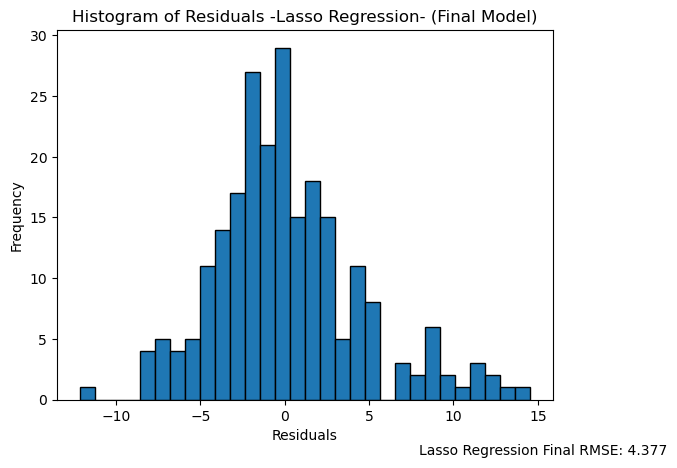

In [256]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Lasso Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Lasso Regression Final RMSE: {_LassoReg_final_rmse:.3f}")

plt.show()


## d. Elastic Net Regression

In [257]:
from sklearn.linear_model import ElasticNet

# Fit the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1, fit_intercept=True,
                         random_state=42, selection='cyclic')
elastic_net.fit(train_dataset_prepared, y_train)


ElasticNet(alpha=0.1, l1_ratio=1, random_state=42)

In [258]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Create an instance of the SGDRegressor model with Elastic Net regularization
sgd_reg = SGDRegressor(penalty="elasticnet", 
                       alpha=0.1,
                       l1_ratio=0.5, 
                       max_iter=1000, 
                       tol=1e-4, 
                       warm_start=False, 
                       random_state=42)

# Fit the model to   training data
sgd_reg.fit(train_dataset_prepared, y_train.ravel())

# Generate predictions on   training data
sgd_reg.predict(train_dataset_prepared)


array([12.5801877 , 14.87220925, 30.19986742, 33.93202021, 23.60129893,
       28.27874578, 12.14268532, 15.74981249,  8.25601062, 35.70155321,
        9.32767113, 27.2928961 , 29.4318657 , 34.90500428, 12.50426369,
       16.01252979, 30.68699821, 19.17778818, 32.53715185, 15.60935867,
       13.09838331, 30.04816262, 33.3588491 , 21.19426724, 10.01267881,
       27.06449648, 18.26274507, 21.52691568, 19.13116718, 13.83260365,
       14.80388899, 16.47633692, 12.6251618 , 12.21766846, 31.8344627 ,
       26.62549316, 30.05307884,  8.04034625, 30.29184389, 32.53348442,
       31.575603  , 25.24502723, 12.5359713 , 12.14339568, 10.1957863 ,
       12.73789351, 13.10265224, 18.31853667, 19.06780111, 14.24563114,
       11.49755237, 27.23337467, 12.21497615, 10.14133186, 29.34257706,
       34.98801806, 16.75999639, 17.82434702,  9.61987412, 19.45585784,
       12.02801356, 10.13287314, 35.58145891, 29.85651482, 26.40055089,
       20.74463138, 24.68509983, 23.1630775 , 18.39861607, 27.00

### Test set to evaluation Elastic Net 

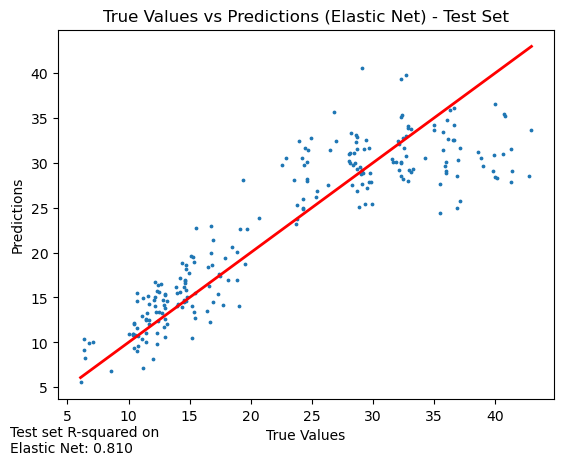

In [259]:
# Prepare the test set
test_predictions =elastic_net.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = elastic_net.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Elastic Net) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nElastic Net: {test_accuracy:.3f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()


### Performance evaluation using R-squared - Elastic Net Regression

In [260]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, elastic_net.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.3f}")
print(f"Test set R-squared: {test_r2:.3f}")


Training set R-squared: 0.797
Test set R-squared: 0.810


### Mean Square Error on Elasti Net Regression

In [261]:
from sklearn.metrics import mean_absolute_error

# MAE scores
train_mae = mean_absolute_error(y_train, elastic_net.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

from sklearn.metrics import mean_squared_error

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, elastic_net.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 3.4543421115261714
Test MAE: 3.2634997900861156
Training RMSE: 4.539008876004815
Test RMSE: 4.389240664698885


### Elastic Net Cross Validation

In [262]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [263]:
from sklearn.model_selection import cross_val_score

# Fit the Lasso Regression model
elastic_net = ElasticNet(alpha=1, random_state=42)
elastic_net.fit(train_dataset_prepared, y_train)

# Cross-validation for Elastic Net Regression
elastic_net_scores = cross_val_score(elastic_net, train_dataset_prepared, y_train,
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
elastic_net_rmse_scores = np.sqrt(-lasso_scores)

display_scores(elastic_net_rmse_scores)

Scores: [4.89617077 4.04996835 5.60835203 4.9564281  5.21307306 5.17115055
 4.92897993 5.10220324 5.47690586 3.49409561]
Mean: 4.889732750055808
Standard deviation: 0.6122999173547062


In [264]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
param_grid = [
    {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0, 0.35, 0.5, 0.75, 1],
        'max_iter': [1000],
        'tol': [1e-3, 1e-4, 1e-5],
        'warm_start': [False],
        'random_state': [42],
    }
]

# Create the ElasticNet model
elastic_net = ElasticNet()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train)


/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.490e+03, tolerance: 4.372e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+03, tolerance: 4.194e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0, 0.35, 0.5, 0.75, 1],
                          'max_iter': [1000], 'random_state': [42],
                          'tol': [0.001, 0.0001, 1e-05],
                          'warm_start': [False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [265]:
grid_search.best_params_

{'alpha': 0.01,
 'l1_ratio': 0,
 'max_iter': 1000,
 'random_state': 42,
 'tol': 0.001,
 'warm_start': False}

### Grid Search Results

In [266]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621433556915016 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.621433556915016 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.621433556915016 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.621516172306513 {'alpha': 0.001, 'l1_ratio': 0.35, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.62148184088415 {'alpha': 0.001, 'l1_ratio': 0.35, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.621475200954176 {'alpha': 0.001, 'l1_ratio': 0.35, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.621546840133803 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.621498579652348 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4

In [267]:

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008339      0.001088         0.001168        0.000194       0.001   
1        0.007509      0.000331         0.000691        0.000034       0.001   
2        0.008845      0.003972         0.000697        0.000195       0.001   
3        0.002298      0.000288         0.000796        0.000147       0.001   
4        0.002849      0.000437         0.000760        0.000103       0.001   
..            ...           ...              ...             ...         ...   
85       0.001985      0.000311         0.000631        0.000090         100   
86       0.002375      0.000461         0.001302        0.000600         100   
87       0.003078      0.000645         0.000720        0.000086         100   
88       0.002079      0.000527         0.000814        0.000492         100   
89       0.002536      0.000474         0.000899        0.000211         100   

   param_l1_ratio param_max_iter param_random_state param_tol  \
0               0           1000                 42     0.001   
1               0           1000                 42    0.0001   
2               0           1000                 42   0.00001   
3            0.35           1000                 42     0.001   
4            0.35           1000                 42    0.0001   
..            ...            ...                ...       ...   
85           0.75           1000                 42    0.0001   
86           0.75           1000                 42   0.00001   
87              1           1000                 42     0.001   
88              1           1000                 42    0.0001   
89              1           1000                 42   0.00001   

   param_warm_start  ... mean_test_score  std_test_score  rank_test_score  \
0             False  ...      -21.357648        2.146868               13   
1             False  ...      -21.357648        2.146868               13   
2             False  ...      -21.357648        2.146868               13   
3             False  ...      -21.358412        2.146766               20   
4             False  ...      -21.358094        2.146568               17   
..              ...  ...             ...             ...              ...   
85            False  ...     -102.224797       11.208090               76   
86            False  ...     -102.224797       11.208090               76   
87            False  ...     -102.224797       11.208090               76   
88            False  ...     -102.224797       11.208090               76   
89            False  ...     -102.224797       11.208090               76   

    split0_train_score  split1_train_score  split2_train_score  \
0           -20.880778          -19.962328          -20.234779   
1           -20.880778          -19.962328          -20.234779   
2           -20.880778          -19.962328          -20.234779   
3           -20.880746          -19.962304          -20.234746   
4           -20.880747          -19.962305          -20.234747   
..                 ...                 ...                 ...   
85         -101.907834          -97.764668         -100.452010   
86         -101.907834          -97.764668         -100.452010   
87         -101.907834          -97.764668         -100.452010   
88         -101.907834          -97.764668         -100.452010   
89         -101.907834          -97.764668         -100.452010   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -19.689318          -21.006883        -20.354817         0.512478  
1           -19.689318          -21.006883        -20.354817         0.512478  
2           -19.689318          -21.006883        -20.354817         0.512478  
3           -19.689282          -21.006854        -20.354786         0.512479  
4           -19.689283          -21.006854        -20.354787         0.512479  
..                 ...                 ...               ...    

In [268]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621433556915016 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.621433556915016 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.621433556915016 {'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.621516172306513 {'alpha': 0.001, 'l1_ratio': 0.35, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.62148184088415 {'alpha': 0.001, 'l1_ratio': 0.35, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4.621475200954176 {'alpha': 0.001, 'l1_ratio': 0.35, 'max_iter': 1000, 'random_state': 42, 'tol': 1e-05, 'warm_start': False}
4.621546840133803 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001, 'warm_start': False}
4.621498579652348 {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001, 'warm_start': False}
4

In [269]:
grid_search.best_estimator_.coef_

array([-0.28123823, -0.74603261,  1.70633571, -2.70395941,  5.42370174,
       -0.21077583,  2.7130577 ,  0.224548  , -0.29178717, -0.02226117,
        0.31404833])

In [270]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_ElasticNet_final_rmse= np.sqrt(final_mse)

In [271]:
_ElasticNet_final_rmse

4.384724820982483

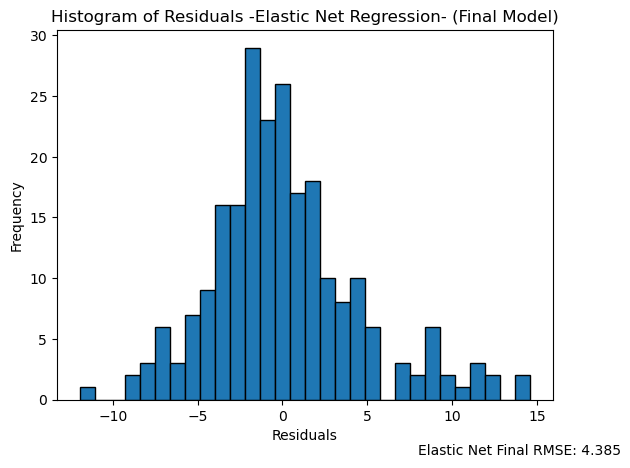

In [272]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Elastic Net Regression- (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Elastic Net Final RMSE: {_ElasticNet_final_rmse:.3f}")

plt.show()



## e. Polynomial Regression with Regularisation

In [273]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model with Ridge regularization
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=0.1, fit_intercept=True, random_state=42)
)

# Fit the model to   training data
poly_ridge_reg.fit(train_dataset_prepared, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=0.1, random_state=42))])

In [274]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model with L2 regularization (Ridge) using SGDRegressor
poly_sgd_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    SGDRegressor(penalty="l2", alpha=0.1, max_iter=1000, tol=1e-4, random_state=42)
)

# Fit the model to   training data
poly_sgd_reg.fit(train_dataset_prepared, y_train.ravel())

# Generate predictions on the  training data
poly_sgd_reg.predict(train_dataset_prepared)


array([11.1339688 , 14.81897967, 31.83758597, 35.10437349, 23.16105045,
       30.91374243, 13.67459294, 17.33671472,  8.54831957, 32.80534385,
        9.62028025, 25.64945016, 31.1198188 , 33.27809357, 11.64757185,
       14.84175383, 33.15556423, 15.4746921 , 35.68541437, 14.60093037,
       16.7734842 , 31.90319687, 34.73426444, 21.91955772, 11.17607696,
       29.37997   , 15.87428085, 17.72724128, 17.23341646, 13.12987847,
       13.54751375, 17.40706901, 11.74015503, 13.22090956, 29.75899853,
       27.1190032 , 29.64261333, 10.32325976, 31.82293899, 34.62523479,
       29.76353144, 27.03163904, 12.22506242, 11.84639735,  9.86084651,
       11.24540107, 15.85315678, 18.58883928, 16.32756175, 12.72699649,
       13.44719757, 17.52815616, 14.12969229, 10.10866756, 29.44263501,
       36.82649598, 18.54597841, 19.16044183, 11.05864096, 19.01725102,
        9.54228867, 11.20435787, 34.92230637, 30.197422  , 24.93711749,
       18.83801677, 27.9305773 , 17.54509009, 17.70027123, 28.01

### Transforming dataset using PolynomialFeatures

In [275]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to   training data
poly_reg.fit(train_dataset_prepared, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Test set to evaluation Polynomial Regression with regularisation

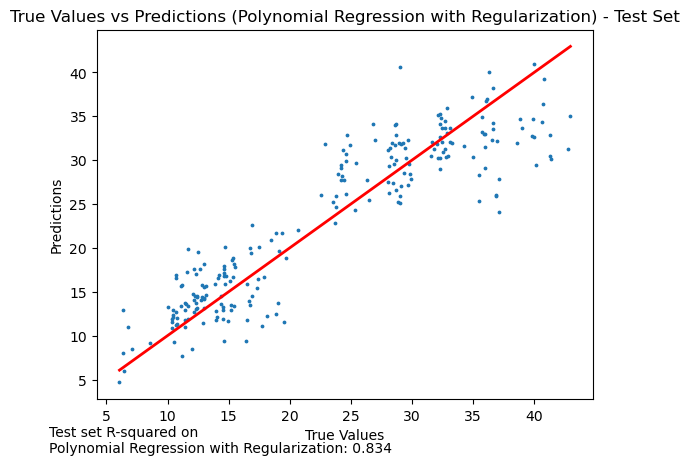

In [276]:
# Prepare the test set
test_predictions = poly_reg.predict(test_dataset_prepared)

# Calculate R-squared on the test set
test_accuracy = poly_reg.score(test_dataset_prepared, y_test)

# Create a scatter plot comparing true values with predicted values for the test set
plt.scatter(y_test, test_predictions, s=3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Polynomial Regression with Regularization) - Test Set")

# Add a reference line for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Print the R-squared value (test set accuracy) at the bottom of the plot
plt.text(0.05, 0, f"Test set R-squared on\nPolynomial Regression with Regularization: {test_accuracy:.3f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()


### Performance Evaluation using R-Squared- Polynomial Regression

In [277]:
from sklearn.metrics import r2_score

# R-squared scores
train_r2 = r2_score(y_train, poly_reg.predict(train_dataset_prepared))
test_r2 = r2_score(y_test, test_predictions)
print(f"Training set R-squared: {train_r2:.3f}")
print(f"Test set R-squared: {test_r2:.3f}")

Training set R-squared: 0.854
Test set R-squared: 0.834


### Mean Square Error on Polynomial Regression

In [278]:
from sklearn.metrics import mean_absolute_error


train_mae = mean_absolute_error(y_train, poly_ridge_reg.predict(train_dataset_prepared))
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

# RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, poly_ridge_reg.predict(train_dataset_prepared)))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training MAE: 2.9712727264996515
Test MAE: 3.1919017180735936
Training RMSE: 3.852694916894171
Test RMSE: 4.108379872415635


### Polynomial Regression Cross  Validation

In [279]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

### Polynomial Regression- Cross Validation

In [280]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a Polynomial Regression model with L2 regularization (Ridge)
degree = 2
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    StandardScaler(),
    Ridge(alpha=1, random_state=42)
)

# Fit the model to the training data
poly_ridge_reg.fit(train_dataset_prepared, y_train.ravel())

# Cross-validation for Ridge Regression with polynomial features
ridge_scores = cross_val_score(poly_ridge_reg, train_dataset_prepared, y_train.ravel(),
                               n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

display_scores(ridge_rmse_scores)


Scores: [4.25496993 4.07076058 4.71837279 4.31049354 4.27417012 4.04915968
 4.71917403 4.62140564 4.7583439  3.70968239]
Mean: 4.348653261190523
Standard deviation: 0.33274666723795565


In [281]:
# Define the parameter grid for Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the parameter grid for Ridge Regression
param_grid = [
    {
        'polynomialfeatures__degree': [1, 2, 3, 4],
        'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'ridge__tol': [1e-3, 1e-4, 1e-5],
    }
]

# Create the Polynomial Regression model with Ridge regularization
degree = 2
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    StandardScaler(),
    Ridge(random_state=42)
)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(poly_ridge_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train.ravel())

# Create the Polynomial Regression model with Ridge regularization
poly_ridge_reg = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    StandardScaler(),
    Ridge(random_state=42)
)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(poly_ridge_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Fit the model with the prepared training data
grid_search.fit(train_dataset_prepared, y_train.ravel())


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'polynomialfeatures__degree': [1, 2, 3, 4],
                          'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                          'ridge__tol': [0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [282]:
grid_search.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10, 'ridge__tol': 0.001}

In [283]:
grid_search.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10, random_state=42, tol=0.001))])

In [284]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.621642804361449 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001, 'ridge__tol': 0.001}
4.621642804361449 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001, 'ridge__tol': 0.0001}
4.621642804361449 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001, 'ridge__tol': 1e-05}
4.621639117006363 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.01, 'ridge__tol': 0.001}
4.621639117006363 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.01, 'ridge__tol': 0.0001}
4.621639117006363 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.01, 'ridge__tol': 1e-05}
4.621602627072083 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1, 'ridge__tol': 0.001}
4.621602627072083 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1, 'ridge__tol': 0.0001}
4.621602627072083 {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1, 'ridge__tol': 1e-05}
4.621275575266341 {'polynomialfeatures__degree': 1, 'ridge__alpha': 1, 'ridge__tol': 0.001}
4.621275575266341 {'polynomialfeatures__degree': 1

In [285]:
# here are the cross validation results in full as a dataframe

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.006559      0.002233         0.001858        0.001103   
1        0.006797      0.003101         0.001862        0.000665   
2        0.004856      0.001466         0.001378        0.000698   
3        0.008038      0.008234         0.001363        0.000513   
4        0.004669      0.001058         0.001220        0.000331   
..            ...           ...              ...             ...   
67       0.100779      0.002394         0.007554        0.002456   
68       0.095230      0.007241         0.008083        0.004189   
69       0.095886      0.015251         0.004272        0.000749   
70       0.097447      0.011509         0.004494        0.001715   
71       0.070721      0.016430         0.010497        0.008520   

   param_polynomialfeatures__degree param_ridge__alpha param_ridge__tol  \
0                                 1              0.001            0.001   
1                                 1              0.001           0.0001   
2                                 1              0.001          0.00001   
3                                 1               0.01            0.001   
4                                 1               0.01           0.0001   
..                              ...                ...              ...   
67                                4                 10           0.0001   
68                                4                 10          0.00001   
69                                4                100            0.001   
70                                4                100           0.0001   
71                                4                100          0.00001   

                                               params  split0_test_score  \
0   {'polynomialfeatures__degree': 1, 'ridge__alph...         -19.026522   
1   {'polynomialfeatures__degree': 1, 'ridge__alph...         -19.026522   
2   {'polynomialfeatures__degree': 1, 'ridge__alph...         -19.026522   
3   {'polynomialfeatures__degree': 1, 'ridge__alph...         -19.026447   
4   {'polynomialfeatures__degree': 1, 'ridge__alph...         -19.026447   
..                                                ...                ...   
67  {'polynomialfeatures__degree': 4, 'ridge__alph...         -57.918426   
68  {'polynomialfeatures__degree': 4, 'ridge__alph...         -57.918426   
69  {'polynomialfeatures__degree': 4, 'ridge__alph...         -24.035704   
70  {'polynomialfeatures__degree': 4, 'ridge__alph...         -24.035704   
71  {'polynomialfeatures__degree': 4, 'ridge__alph...         -24.035704   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -23.145077  ...       -21.359582        2.147843               34   
1          -23.145077  ...       -21.359582        2.147843               34   
2          -23.145077  ...       -21.359582        2.147843               34   
3          -23.145429  ...       -21.359548        2.147830               31   
4          -23.145429  ...       -21.359548        2.147830               31   
..                ...  ...              ...             ...              ...   
67         -56.212507  ...       -58.873476       13.072931               58   
68         -56.212507  ...       -58.873476       13.072931               58   
69         -27.627406  ...       -28.137409        3.023659               43   
70         -27.627406  ...       -28.137409        3.023659               43   
71         -27.627406  ...       -28.137409        3.023659               43   

    split0_train_score  split1_train_score  split2_train_score  \
0           -20.880708          -19.962273          -20.234707   
1           -20.880708          -19.962273          -20.234707   
2           -20.880708          -19.962273          -20.234707   
3           -20.880708          -19.962273          -20.234707   
4           -20.880708          -19.962273          -20.234707   
..              

In [286]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_Polynomial_final_rmse = np.sqrt(final_mse)

In [287]:
_Polynomial_final_rmse

4.074361442431793

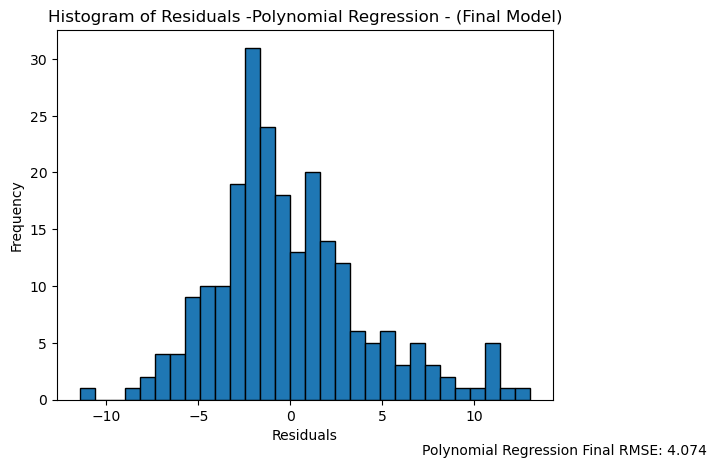

In [288]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - final_predictions

# Plot histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals -Polynomial Regression - (Final Model)')

# Add RMSE value to the plot
plt.text(0.5 * plt.gca().get_xlim()[1], -0.15 * plt.gca().get_ylim()[1], f"Polynomial Regression Final RMSE: {_Polynomial_final_rmse:.3f}")

plt.show()




## f. Neural Network

In [289]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)


# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

TensorFlow version: 2.10.0


In [290]:
X = train_dataset_prepared
y = dataset_labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [291]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

# Make predictions
predictions = model.predict(X_test)

/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
11/11 [==============================] - 1s 18ms/step - loss: 552.2032 - val_loss: 587.1074
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 497.5535 - val_loss: 535.6143
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 452.3939 - val_loss: 488.3875
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 407.8559 - val_loss: 440.9998
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 363.7738 - val_loss: 392.4204
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 319.0371 - val_loss: 342.5219
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 272.9338 - val_loss: 293.2686
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 229.3467 - val_loss: 244.2040
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 186.3725 - val_loss: 199.8319
Epoch 10/50
11/11 [==============================] - 0s 10ms/step - loss: 149.692

### Grid Search Cross Validation for Neural Network

In [292]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(neurons_layer1=64, neurons_layer2=32, activation='sigmoid', optimizer='adam', lr=0.001):
    model = Sequential()
    model.add(Dense(neurons_layer1, input_dim=X.shape[1], activation=activation))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    opt = keras.optimizers.get(optimizer)
    opt.learning_rate.assign(lr)
    
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

# Create the KerasRegressor model
regressor = KerasRegressor(build_fn=create_model)

# Define the parameter grid for the KerasRegressor model
param_grid = {
    'neurons_layer1': [32, 64],
    'neurons_layer2': [16, 32],
    'activation': ['sigmoid', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'lr': [0.001, 0.01],
    'epochs': [100],
    'batch_size': [16, 32],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model with the prepared training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_1179/149872149.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model)
2023-03-20 14:04:40.133788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 14:04:40.133812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild Ten

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
19/19 [==============================] - 1s 10ms/step - loss: 603.1917
Epoch 2/100
19/19 [==============================] - 2s 11ms/step - loss: 580.6628
Epoch 2/100
19/19 [==============================] - 2s 13ms/step - loss: 553.9842
Epoch 2/100
19/19 [==============================] - 2s 6ms/step - loss: 533.2194
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 521.1596
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 487.5381
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 538.5269
Epoch 3/100
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 548.2775
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 434.2456
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 540.4085
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 488.6

10/10 [==============================] - 0s 5ms/step - loss: 21.7158
Epoch 79/100
10/10 [==============================] - 0s 7ms/step - loss: 20.7372
Epoch 98/100
10/10 [==============================] - 0s 2ms/step - loss: 21.6458
Epoch 80/100
10/10 [==============================] - 0s 3ms/step - loss: 20.6968
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 21.5867
Epoch 81/100
10/10 [==============================] - 0s 3ms/step - loss: 20.6381
Epoch 100/100
10/10 [==============================] - 0s 3ms/step - loss: 21.5126
Epoch 82/100
10/10 [==============================] - 0s 6ms/step - loss: 21.4508
Epoch 83/100
10/10 [==============================] - 0s 2ms/step - loss: 21.4119
Epoch 84/100
10/10 [==============================] - 0s 2ms/step - loss: 21.3135
Epoch 85/100
10/10 [==============================] - 0s 2ms/step - loss: 21.2632
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 21.2472
Epoch 87/100
10/10 [========

10/10 [==============================] - 0s 2ms/step - loss: 20.8267
Epoch 93/100
10/10 [==============================] - 0s 16ms/step - loss: 20.8191
Epoch 94/100
10/10 [==============================] - 0s 7ms/step - loss: 20.7244
Epoch 95/100
10/10 [==============================] - 0s 3ms/step - loss: 20.6711
Epoch 96/100
10/10 [==============================] - 0s 2ms/step - loss: 20.5959
Epoch 97/100
10/10 [==============================] - 0s 8ms/step - loss: 20.5487
Epoch 98/100
10/10 [==============================] - 0s 3ms/step - loss: 20.5441
Epoch 99/100
10/10 [==============================] - 0s 2ms/step - loss: 20.4585
Epoch 100/100
10/10 [==============================] - 0s 7ms/step - loss: 20.4382
Epoch 1/100
10/10 [==============================] - 3s 3ms/step - loss: 531.9998
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 470.5016
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 425.3332
Epoch 4/100
10/10 [========

0
10/10 [==============================] - 0s 6ms/step - loss: 487.5569
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 21.3349
Epoch 59/100
10/10 [==============================] - 0s 2ms/step - loss: 444.8977
Epoch 63/100
Epoch 71/100
Epoch 5/100
10/10 [==============================] - 5s 502ms/step - loss: 91.2632
Epoch 25/100
10/10 [==============================] - 5s 503ms/step - loss: 26.2482
Epoch 33/100
10/10 [==============================] - 5s 503ms/step - loss: 22.7012
Epoch 44/100
10/10 [==============================] - 0s 4ms/step - loss: 19.2708
Epoch 64/100
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 16.1322
Epoch 72/100
10/10 [==============================] - 0s 5ms/step - loss: 30.7838
Epoch 24/100
10/10 [==============================] - 0s 6ms/step - loss: 402.1632
Epoch 26/100
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 25.6067
Epoch 34/100
10/10 [==============================]

10/10 [==============================] - 0s 11ms/step - loss: 19.7104
Epoch 99/100
10/10 [==============================] - 0s 12ms/step - loss: 19.7083
Epoch 85/100
10/10 [==============================] - 0s 8ms/step - loss: 19.6598
Epoch 100/100
10/10 [==============================] - 0s 7ms/step - loss: 19.6692
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 19.6031
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 541.8020
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 19.5445
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 495.2932
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 453.3010

10/10 [==============================] - 0s 4ms/step - loss: 19.4719
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 443.6616
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 19.5895
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 389.0149
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 19.3550
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 332.9658
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 19.3062
Epoch 92/100
10/10 [==============================] - 0s 3ms/step - loss: 278.8979
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 19.2745
Epoch 93/100
10/10 [==============================] - 0s 3ms/step - loss: 19.2363
Epoch 94/100
10/10 [==============================] - 0s 7ms/step - loss: 19.1962
Epoch 95/100
10/10 [==============================] - 0s 6ms/step - loss: 141.5378
Epoch 11/100
10/10 [========

10/10 [==============================] - 0s 4ms/step - loss: 29.7648
Epoch 30/100
10/10 [==============================] - 0s 4ms/step - loss: 29.1492
Epoch 31/100
10/10 [==============================] - 0s 3ms/step - loss: 28.6432
Epoch 32/100
10/10 [==============================] - 0s 6ms/step - loss: 28.1385
Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 27.6988
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 27.3054
Epoch 35/100
10/10 [==============================] - 0s 7ms/step - loss: 26.9745
Epoch 36/100
10/10 [==============================] - 0s 8ms/step - loss: 26.5932
Epoch 37/100
10/10 [==============================] - 0s 4ms/step - loss: 26.3520
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 26.0487
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss: 25.8204
Epoch 40/100
10/10 [==============================] - 0s 3ms/step - loss: 25.5404
Epoch 41/100
10/10 [=========

Epoch 52/100
10/10 [==============================] - 0s 3ms/step - loss: 20.9704
Epoch 86/100
10/10 [==============================] - 0s 3ms/step - loss: 22.4266
Epoch 40/100
10/10 [==============================] - 0s 3ms/step - loss: 21.2257
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 16.6732
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 20.9104
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 22.1818
Epoch 41/100
10/10 [==============================] - 0s 3ms/step - loss: 16.5261
Epoch 65/100
10/10 [==============================] - 0s 6ms/step - loss: 21.1120
Epoch 54/100
10/10 [==============================] - 0s 3ms/step - loss: 16.4486
Epoch 66/100
10/10 [==============================] - 0s 7ms/step - loss: 20.8692
Epoch 88/100
10/10 [==============================] - 0s 6ms/step - loss: 21.9685
Epoch 42/100
10/10 [==============================] - 0s 3ms/step - loss: 16.2617
Epoch 67/100
10/

3/3 [==============================] - 0s 2ms/step
Epoch 1/100
3/3 [==============================] - 0s 2ms/step
Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 523.0810
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 456.1796
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 403.7829
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 354.9918
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 308.4361
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 262.7749
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 219.4828
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 179.3170
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 143.6502
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 112.6569
Epoch 11/100
10/10 [==============================] - 0s 7ms/step

10/10 [==============================] - 1s 3ms/step - loss: 475.3925
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 211.3328
Epoch 1/100
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 57.2028
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 47.2081
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 28.3410
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 27.1940
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 24.6115
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 23.0680
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 22.2324
Epoch 10/100
10/10 [==============================] - 1s 3ms/step - loss: 464.7668
Epoch 11/100
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 238.8112
Epoch 3/100
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 65.00

10/10 [==============================] - 0s 6ms/step - loss: 17.4322
Epoch 13/100
10/10 [==============================] - 0s 4ms/step - loss: 11.6727
Epoch 33/100
10/10 [==============================] - 0s 4ms/step - loss: 12.4473
Epoch 23/100
10/10 [==============================] - 0s 4ms/step - loss: 12.0076
Epoch 24/100
10/10 [==============================] - 0s 14ms/step - loss: 16.7218
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 11.6710
Epoch 25/100
10/10 [==============================] - 0s 13ms/step - loss: 11.6432
Epoch 34/100
10/10 [==============================] - 0s 5ms/step - loss: 16.2019
Epoch 15/100
10/10 [==============================] - 0s 4ms/step - loss: 11.5702


Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 15.4840
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 11.5540
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 14.4763
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 11.3154
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 14.4266
Epoch 18/100
10/10 [==============================] - 0s 12ms/step - loss: 12.1075
Epoch 26/100
10/10 [==============================] - 0s 2ms/step - loss: 11.3154
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 14.7900
Epoch 19/100
10/10 [==============================] - 0s 4ms/step - loss: 11.8125
Epoch 27/100
10/10 [==============================] - 0s 3ms/step - loss: 10.8353
Epoch 28/100
10/10 [==============================] - 0s 2ms/step - loss: 11.5112
Epoch 29/100
10/10 [==============================] - 0s 3ms/step - loss: 11.0005
Epoch 20/100
Ep

10/10 [==============================] - 0s 3ms/step - loss: 9.6999
Epoch 51/100
Epoch 41/100
10/10 [==============================] - 0s 7ms/step - loss: 11.0150
Epoch 32/100
10/10 [==============================] - 0s 3ms/step - loss: 10.0701
Epoch 42/100
10/10 [==============================] - 0s 4ms/step - loss: 9.7766
Epoch 43/100
10/10 [==============================] - 0s 24ms/step - loss: 10.7853
Epoch 52/100
10/10 [==============================] - 0s 23ms/step - loss: 10.6798
Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 10.4387
Epoch 53/100
10/10 [==============================] - 0s 3ms/step - loss: 10.6861
Epoch 34/100
10/10 [==============================] - 0s 2ms/step - loss: 9.8779
Epoch 54/100
10/10 [==============================] - 0s 3ms/step - loss: 9.5032
Epoch 35/100
Epoch 44/100
10/10 [==============================] - 0s 3ms/step - loss: 9.9047
Epoch 36/100
Epoch 55/100
10/10 [==============================] - 0s 3ms/step - loss: 9

10/10 [==============================] - 0s 4ms/step - loss: 9.5349
Epoch 81/100
10/10 [==============================] - 3s 2ms/step - loss: 255.7878
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 23.0397
Epoch 82/100
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 30.3675
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 7.3586
Epoch 83/100
10/10 [==============================] - 0s 4ms/step - loss: 21.6155
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 26.1776
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 19.9461
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 19.3068
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 18.5144
Epoch 11/100
10/10 [==============================] - 0s 6ms/step - loss: 24.4101
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 7.5440
Epoch 85/100
10/10 [=====

Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 21.7135
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 8.2385
Epoch 86/100
10/10 [==============================] - 0s 5ms/step - loss: 17.8720
Epoch 13/100
10/10 [==============================] - 0s 4ms/step - loss: 22.5692
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 23.0683
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 7.5746
Epoch 88/100
10/10 [==============================] - 0s 5ms/step - loss: 16.2325
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 20.8081
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 21.2889
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 8.4814
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 15.8464
Epoch 16/100
10/10 [==============================] - 0s 7ms/step - loss: 19.0739
Epoch 12/100
Epoch 1/1

10/10 [==============================] - 5s 3ms/step - loss: 324.6277
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 9.5603
Epoch 40/100
10/10 [==============================] - 0s 2ms/step - loss: 51.3664
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 29.8593
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 10.4771
Epoch 41/100
10/10 [==============================] - 0s 2ms/step - loss: 25.4169
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 24.6288
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 11.3903
Epoch 36/100
10/10 [==============================] - 0s 8ms/step - loss: 10.6019
Epoch 42/100
10/10 [==============================] - 0s 2ms/step - loss: 12.7852
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 11.7166
Epoch 38/100
10/10 [==============================] - 0s 4ms/step - loss: 9.8285
Epoch 43/100
10/10 [==============

In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
11/11 [==============================] - 1s 25ms/step - loss: 581.5603 - val_loss: 629.3188
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 540.1060 - val_loss: 586.5770
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 502.3491 - val_loss: 548.6727
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 466.9554 - val_loss: 509.5488
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 429.8148 - val_loss: 468.6529
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 391.1636 - val_loss: 425.0386
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 350.4587 - val_loss: 379.7046
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 307.7757 - val_loss: 334.0854
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 267.2033 - val_loss: 286.9794
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 225.4316

### Mean Square Error on Neural Network

In [294]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Flatten the predictions arrays (if needed)
train_predictions = train_predictions.flatten()
test_predictions = test_predictions.flatten()

# Calculate MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

# Calculate MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Calculate RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


6/6 [==============================] - 0s 1ms/step
Training MAE: 3.625483458150228
Test MAE: 3.4041325519703047
Training MSE: 22.268503580454436
Test MSE: 20.091985840319264
Training RMSE: 4.71895153402262
Test RMSE: 4.4824084865526554


### Neural Network Cross Validation

In [295]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std ())

In [296]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='sigmoid'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
    return model

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Create the KerasRegressor model
regressor = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Calculate cross-validation scores
cv_scores = cross_val_score(regressor, X_train, y_train, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
cv_rmse_scores = np.sqrt(-cv_scores)

# Display the scores
display_scores(cv_rmse_scores)


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_1179/1553165906.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)
/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Use

Scores: [5.5256434  5.91821369 5.09500771 4.07364335 4.26900167 5.44617252
 4.65908924 3.76502304 4.20706789 4.32297662]
Mean: 4.728183914171557
Standard deviation: 0.6862695770344814


In [297]:
grid_search.best_params_

{'activation': 'sigmoid',
 'batch_size': 32,
 'epochs': 100,
 'lr': 0.01,
 'neurons_layer1': 64,
 'neurons_layer2': 16,
 'optimizer': 'adam'}

In [298]:
grid_search.best_estimator_

In [299]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.030723328930219 {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100, 'lr': 0.001, 'neurons_layer1': 32, 'neurons_layer2': 16, 'optimizer': 'adam'}
3.7933951215887682 {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100, 'lr': 0.001, 'neurons_layer1': 32, 'neurons_layer2': 16, 'optimizer': 'rmsprop'}
4.009309079239897 {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100, 'lr': 0.001, 'neurons_layer1': 32, 'neurons_layer2': 32, 'optimizer': 'adam'}
3.7215581200680727 {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100, 'lr': 0.001, 'neurons_layer1': 32, 'neurons_layer2': 32, 'optimizer': 'rmsprop'}
4.193305479138854 {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100, 'lr': 0.001, 'neurons_layer1': 64, 'neurons_layer2': 16, 'optimizer': 'adam'}
3.7447964672663083 {'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100, 'lr': 0.001, 'neurons_layer1': 64, 'neurons_layer2': 16, 'optimizer': 'rmsprop'}
4.2147321535768505 {'activation': 'sigmoid', 'batch_size':

In [300]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       16.648998      3.062042         0.746908        0.091349   
1       15.991366      4.402027         0.623988        0.081700   
2       11.694607      0.346597         0.642487        0.079276   
3       13.720743      0.186540         0.600057        0.092554   
4       14.078168      0.915326         0.855124        0.367259   
..            ...           ...              ...             ...   
59      11.404074      0.823148         0.572119        0.124931   
60      12.144257      0.589792         0.667513        0.248481   
61      15.005829      1.016754         1.038458        0.146211   
62      47.895109     70.150678         1.549004        1.951591   
63     181.189858      5.826529         3.197397        4.445338   

   param_activation param_batch_size param_epochs param_lr  \
0           sigmoid               16          100    0.001   
1           sigmoid               16          100    0.001   
2           sigmoid               16          100    0.001   
3           sigmoid               16          100    0.001   
4           sigmoid               16          100    0.001   
..              ...              ...          ...      ...   
59             tanh               32          100     0.01   
60             tanh               32          100     0.01   
61             tanh               32          100     0.01   
62             tanh               32          100     0.01   
63             tanh               32          100     0.01   

   param_neurons_layer1 param_neurons_layer2 param_optimizer  \
0                    32                   16            adam   
1                    32                   16         rmsprop   
2                    32                   32            adam   
3                    32                   32         rmsprop   
4                    64                   16            adam   
..                  ...                  ...             ...   
59                   32                   32         rmsprop   
60                   64                   16            adam   
61                   64                   16         rmsprop   
62                   64                   32            adam   
63                   64                   32         rmsprop   

                                               params  split0_test_score  \
0   {'activation': 'sigmoid', 'batch_size': 16, 'e...         -25.225691   
1   {'activation': 'sigmoid', 'batch_size': 16, 'e...         -22.598730   
2   {'activation': 'sigmoid', 'batch_size': 16, 'e...         -24.199662   
3   {'activation': 'sigmoid', 'batch_size': 16, 'e...         -20.717831   
4   {'activation': 'sigmoid', 'batch_size': 16, 'e...         -27.126296   
..                                                ...                ...   
59  {'activation': 'tanh', 'batch_size': 32, 'epoc...         -25.076927   
60  {'activation': 'tanh', 'batch_size': 32, 'epoc...         -19.731779   
61  {'activation': 'tanh', 'batch_size': 32, 'epoc...         -20.200246   
62  {'activation': 'tanh', 'batch_size': 32, 'epoc...         -23.960391   
63  {'activation': 'tanh', 'batch_size': 32, 'epoc...         -19.029733   

    split1_test_score  split2_test_score  split3_test_score  \
0          -13.820787         -16.517809         -13.162664   
1          -12.253776         -15.285237         -10.639818   
2          -14.782392         -16.549475         -12.754043   
3          -11.806869         -14.584738         -10.712747   
4          -15.363044         -19.473728         -13.260764   
..                ...                ...                ...   
59         -18.211357         -17.415203         -10.348661   
60         -19.380825         -21.020684         -11.933969   
61         -16.564326         -17.486867         -12.375130   
62         -21.582299         -15.640394          -9.475580   
63         -17.591926         -17.363822         -13.302252   

   

In [328]:
final_model = grid_search.best_estimator_

X_test_prepared = dataset_num_tr
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
_NeuralNet_final_rmse = np.sqrt(final_mse)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_4/dense_12/BiasAdd' defined at (most recent call last):
    File "/Users/sandorkanda/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/sandorkanda/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 530, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_1179/2429827211.py", line 4, in <module>
      final_predictions = final_model.predict(X_test_prepared)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/wrappers/scikit_learn.py", line 379, in predict
      return np.squeeze(self.model.predict(x, **kwargs))
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/sandorkanda/miniconda3/lib/python3.9/site-packages/keras/layers/core/dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_4/dense_12/BiasAdd'
Matrix size-incompatible: In[0]: [32,8], In[1]: [11,64]
	 [[{{node sequential_4/dense_12/BiasAdd}}]] [Op:__inference_predict_function_30837]

In [329]:
NeuralNet = np.sqrt(final_mse)
print(NeuralNet)

4.074361442431793


# IV. Model selection

Polynomial Regression RMSE: 4.074
Neural Network RMSE: 4.074
Lasso Regression RMSE: 4.377
Linear Regression RMSE: 4.377
Ridge Regression RMSE: 4.377
Elastic Net RMSE: 4.385

The best model is Polynomial Regression with an RMSE of 4.074


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_1179/2732288982.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45)


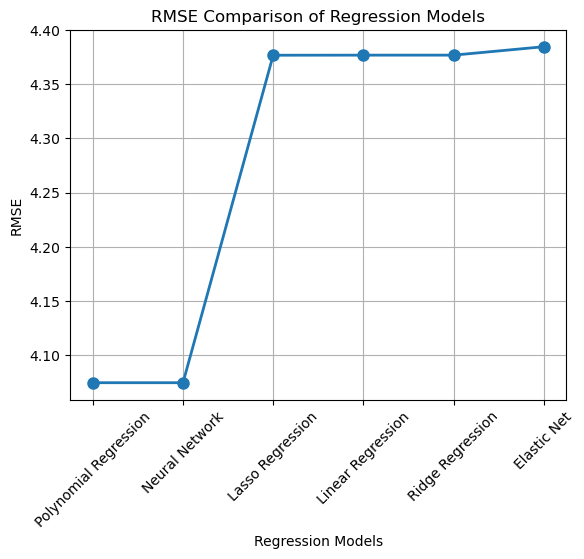

In [332]:
import numpy as np
import matplotlib.pyplot as plt

rmse_values = {
    "Linear Regression": _LinReg_final_rmse,
    "Ridge Regression": _RidgeReg_final_rmse,
    "Lasso Regression": _LassoReg_final_rmse,
    "Elastic Net": _ElasticNet_final_rmse,
    "Polynomial Regression": _Polynomial_final_rmse,
    "Neural Network": NeuralNet
}

sorted_rmse_values = sorted(rmse_values.items(), key=lambda x: x[1])

for model, rmse in sorted_rmse_values:
    print(f"{model} RMSE: {rmse:.3f}")

best_model = sorted_rmse_values[0][0]
best_rmse = sorted_rmse_values[0][1]

print(f"\nThe best model is {best_model} with an RMSE of {best_rmse:.3f}")

# Plotting the RMSE values
models = [item[0] for item in sorted_rmse_values]
rmse_scores = [item[1] for item in sorted_rmse_values]

fig, ax = plt.subplots()
ax.plot(models, rmse_scores, marker="o", linewidth=2, markersize=8)
ax.set_xlabel("Regression Models")
ax.set_ylabel("RMSE")
ax.set_title("RMSE Comparison of Regression Models")
ax.set_xticklabels(models, rotation=45)
ax.grid(True)
plt.show()


# V. Evaluating the 2 best models on test set

In [ ]:
# All models were tested on the test set.

### Final Remarks

This application of predicting the heating load of the prpperties listed in the dataset. It is based on a regression problem, so we used forms of regression algorithms to illustrate this ML analysis process. 

The algorithms used:

simple Linear Regression <br>
Ridge Regression <br>
Lasso Regression <br>
Elastic Net Regression <br>
Polynomial Regression with regularisation <br>
Neural Network<br>

Potential Improvements:

Further feture selection and adding combined attributes, deleting the least collearative features, adding further parameters to the grid search cross validation, further fine tuning to decrease the MSE and RMSE.


